# Loan Prediction Based on Customer Behavior

## Download Datasets from Kaggle API

## Context

An organization wants to predict who possible defaulters are for the consumer loans product. They have data about historic customer behavior based on what they have observed. Hence when they acquire new customers they want to predict who is riskier and who is not.

## Data Dictionary

All values were provided at the time of the loan application.

| Column | Description | Type |
| --- | --- | --- |
| income | `Income of the user` | `int` |
| age | Age of the user | `int` |
| experience | Professional experience of the user in years | int |
| profession | Profession | string |
| married | Whether married or single | string |
| house_ownership | Owned or rented or neither | string |
| car_ownership | Does the person own a car | string |
| risk_flag | Defaulted on a loan | string |
| current_job_years | Years of experience in the current job | int |
| current_house_years | Number of years in the current residence | int |
| city | City of residence | string |
| state | State of residence | string |

The risk_flag indicates whether there has been a default in the past or not.

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
import scipy.stats as stats
from sklearn import preprocessing
from scipy.stats import f_oneway, chi2_contingency
from matplotlib.ticker import FuncFormatter

pd.set_option('display.max_column', None)
sns.set_style('whitegrid')

In [4]:
# Loading the dataset
df = pd.read_csv('../Dataset/Training Data.csv')
df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


## Data Preprocessing

In [3]:
# Check shape of dataset
df.shape

(252000, 13)

In [4]:
# Removing the unnecessary Id as it is an identifier column
df.drop(columns='Id', axis=1, inplace=True)

In [5]:
# Checking missing values
df.isna().sum()

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [6]:
# Checking the data types of the columns
df.dtypes

Income                int64
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Profession           object
CITY                 object
STATE                object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
Risk_Flag             int64
dtype: object

In [7]:
df = df.drop_duplicates()
df.head(5)

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [8]:
df.columns = df.columns.str.lower()
df.rename(columns={"married/single": "married_single"}, inplace=True)
df.columns

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_17260\328107716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"married/single": "married_single"}, inplace=True)


Index(['income', 'age', 'experience', 'married_single', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state', 'current_job_yrs',
       'current_house_yrs', 'risk_flag'],
      dtype='object')

In [9]:
# Descriptive Statistics (numerical features)
df.describe()

,income,age,experience,current_job_yrs,current_house_yrs,risk_flag
count,4.319000e+04,43190.000000,43190.000000,43190.000000,43190.000000,43190.000000
mean,4.999184e+06,49.917411,9.975041,6.298981,12.006275,0.195485
std,2.883155e+06,17.056702,6.034418,3.663603,1.412652,0.396578
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.508307e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,4.984654e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.494142e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


- Minimal pendapatan customer berkisar di angka 10k dengan rata-rata 5m dan pendapatan tertinggi sebesar 10m
- Rata-rata usia customer adalah 49 tahun dengan customer termuda di usia 21 tahun.

## Descriptive Statistic

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
 13  Zone               252000 non-null  object
dtypes: int64(7), object(7)
memory usage: 26.9+ MB


In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,252000.0,1.260005e+05,7.274628e+04,1.0,63000.75,126000.5,189000.25,252000.0
Income,252000.0,4.997117e+06,2.878311e+06,10310.0,2503015.00,5000694.5,7477502.00,9999938.0
Age,252000.0,4.995407e+01,1.706385e+01,21.0,35.00,50.0,65.00,79.0
Experience,252000.0,1.008444e+01,6.002590e+00,0.0,5.00,10.0,15.00,20.0
CURRENT_JOB_YRS,252000.0,6.333877e+00,3.647053e+00,0.0,3.00,6.0,9.00,14.0
CURRENT_HOUSE_YRS,252000.0,1.199779e+01,1.399037e+00,10.0,11.00,12.0,13.00,14.0
Risk_Flag,252000.0,1.230000e-01,3.284379e-01,0.0,0.00,0.0,0.00,1.0


In [13]:
df.describe(include= 'object').transpose()

,count,unique,top,freq
Married/Single,252000,2,single,226272
House_Ownership,252000,3,rented,231898
Car_Ownership,252000,2,no,176000
Profession,252000,51,Physician,5957
CITY,252000,317,Vijayanagaram,1259
STATE,252000,29,Uttar_Pradesh,28400
Zone,252000,6,South Zone,68451


#### Id

Tidak terdapat data yang aneh, hanya identifikasi nomer ID pelanggan sehingga tindak lanjutnya dapat menghapus kolom Id

#### Income

In [14]:
print(df.describe()['Income'])
print(df['Income'].mode()[0])
print(df['Id'].std())

count    2.520000e+05
mean     4.997117e+06
std      2.878311e+06
min      1.031000e+04
25%      2.503015e+06
50%      5.000694e+06
75%      7.477502e+06
max      9.999938e+06
Name: Income, dtype: float64
7936020
72746.27825531695


Mean<Median<Mode <br>
Nilai standar deviasi sangat tinggi menandakan nilai menyebar sangat jauh, range berada disekitaran angka 9 sehingga cukup jelas kalau data Income merupakan data yang tersebar<br>
Skew kanan

#### Age

In [15]:
print(df['Age'].describe().transpose())
print(df['Age'].mode()[0])
print(df['Age'].std())

count    252000.000000
mean         49.954071
std          17.063855
min          21.000000
25%          35.000000
50%          50.000000
75%          65.000000
max          79.000000
Name: Age, dtype: float64
27
17.063854818338424


Modus < Mean < Median <br>
nilai standar deviasi yang tidak terlalu besar menyebabkan data ini tidak terlalu tersebar

#### Experience

In [16]:
print(df['Experience'].describe().transpose())
print(df['Experience'].mode()[0])
print(df['Experience'].std())

count    252000.000000
mean         10.084437
std           6.002590
min           0.000000
25%           5.000000
50%          10.000000
75%          15.000000
max          20.000000
Name: Experience, dtype: float64
6
6.0025898481567515


Data terdistribusi skew kiri namun tidak terlalu besar. ditunjukan dari nilai mean dan median sama.  <br>
Pengalaman bekerja 6 tahun adalah jumlah pengalaman terpanjang pada data tersebut.

#### Married/Single

In [17]:
print(df['Married/Single'].describe().transpose())
print(df['Married/Single'].mode()[0])

count     252000
unique         2
top       single
freq      226272
Name: Married/Single, dtype: object
single


Terdapat 252000 entri data, namun hanya terdapat 2 buah nilai yang berbeda. User yang single lebih banyak dibandingkan user yang sudah menikah.

#### House Ownership

In [18]:
print(df['House_Ownership'].describe().transpose())
print(df['House_Ownership'].mode()[0])
df['House_Ownership'].value_counts()

count     252000
unique         3
top       rented
freq      231898
Name: House_Ownership, dtype: object
rented


House_Ownership
rented          231898
owned            12918
norent_noown      7184
Name: count, dtype: int64

Terdapat 3 jenis kepemilikan rumah yaitu menyewa, pemilik, dan tidak keduanya

#### Car Ownership

In [19]:
print(df['Car_Ownership'].describe().transpose())
print(df['Car_Ownership'].mode()[0])
df['Car_Ownership'].value_counts(normalize=True)

count     252000
unique         2
top           no
freq      176000
Name: Car_Ownership, dtype: object
no


Car_Ownership
no     0.698413
yes    0.301587
Name: proportion, dtype: float64

Tedapat sekitar 70% customer yang tidak memimliki mobil

#### Profession

In [20]:
print(df['Profession'].describe().transpose())
print(df['Profession'].mode()[0])

count        252000
unique           51
top       Physician
freq           5957
Name: Profession, dtype: object
Physician


Terdapat 51 macam pekerjaan dari nasabah, namun pekerjaan sebagai physician adalah yang terbanyak

#### City

In [21]:
print(df['CITY'].describe().transpose())
print(df['CITY'].mode()[0])

count            252000
unique              317
top       Vijayanagaram
freq               1259
Name: CITY, dtype: object
Vijayanagaram


Terdapat nilai unik sebanyak 317 buah untuk kota Vijayanagram sebanyak 1259 buah

#### State

In [22]:
print(df['STATE'].describe().transpose())
print(df['STATE'].mode()[0])

count            252000
unique               29
top       Uttar_Pradesh
freq              28400
Name: STATE, dtype: object
Uttar_Pradesh


#### Current Job Years

In [23]:
print(df['CURRENT_JOB_YRS'].describe().transpose())
print(df['CURRENT_JOB_YRS'].mode()[0])
df['CURRENT_JOB_YRS'].nunique()
df['CURRENT_JOB_YRS'].std()

count    252000.000000
mean          6.333877
std           3.647053
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          14.000000
Name: CURRENT_JOB_YRS, dtype: float64
3


3.647053003160982

Terdapat 15 waktu berbeda dari setiap customer, namun nilai terbanyak berada pada tahun bekerja ke-14 <br>
nilai mode<median<rata-rata, sehingga terdapat kemungkinan data Current job years mengalami skew kanan

#### Current House Yeaer

In [24]:
print(df['CURRENT_HOUSE_YRS'].describe().transpose())
print(df['CURRENT_HOUSE_YRS'].mode()[0])
df['CURRENT_HOUSE_YRS'].nunique()

count    252000.000000
mean         11.997794
std           1.399037
min          10.000000
25%          11.000000
50%          12.000000
75%          13.000000
max          14.000000
Name: CURRENT_HOUSE_YRS, dtype: float64
11


5

#### Risk Flag

In [25]:
df['Risk_Flag'].value_counts(normalize=True)

Risk_Flag
0    0.877
1    0.123
Name: proportion, dtype: float64

## Exploratory Data Analysis (EDA)

### Univariate analysis

In [5]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

#### Age

In [26]:
dfage = df[['Age']]
dfage['AgeGroup'] = dfage['Age'].apply(lambda x: 'U30' if x<=30 else 'U40' if x<=40 else 'U50' if x<=50 else 'U60' if x<= 60 else 'retire')

C:\Users\Asus\AppData\Local\Temp\ipykernel_13964\786723834.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfage['AgeGroup'] = dfage['Age'].apply(lambda x: 'U30' if x<=30 else 'U40' if x<=40 else 'U50' if x<=50 else 'U60' if x<= 60 else 'retire')


(3000.0, 5456.85)

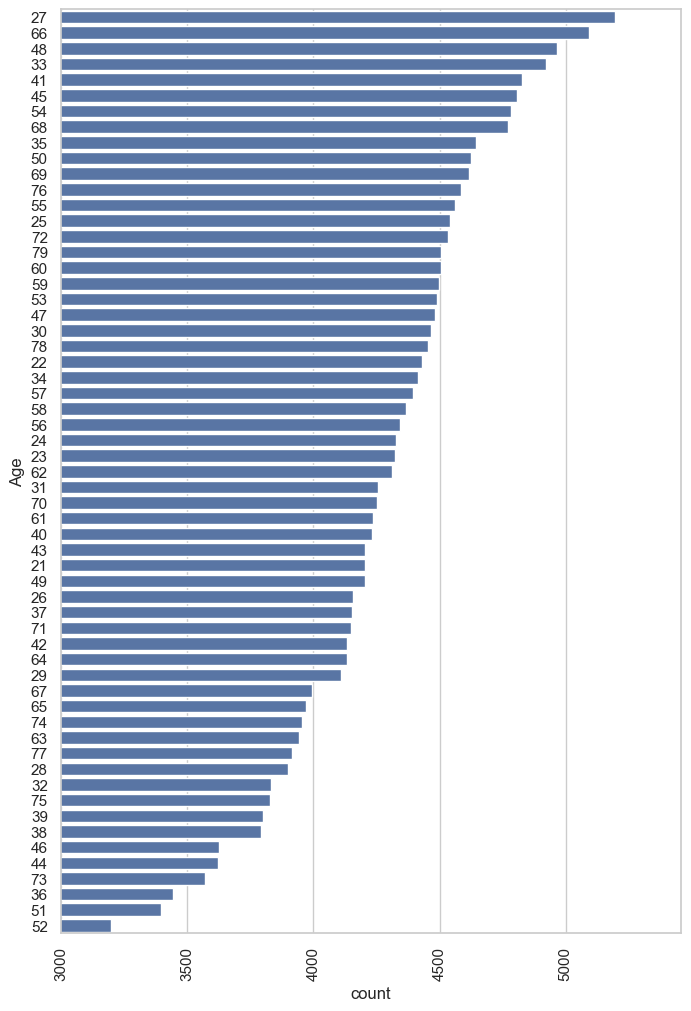

In [27]:
plt.figure(figsize=(8,12))
sns.countplot(y='Age', data=df, order = df['Age'].value_counts().index)
plt.xticks(rotation=90)
sns.set()
plt.xlim(3000)

(3000.0, 84852.6)

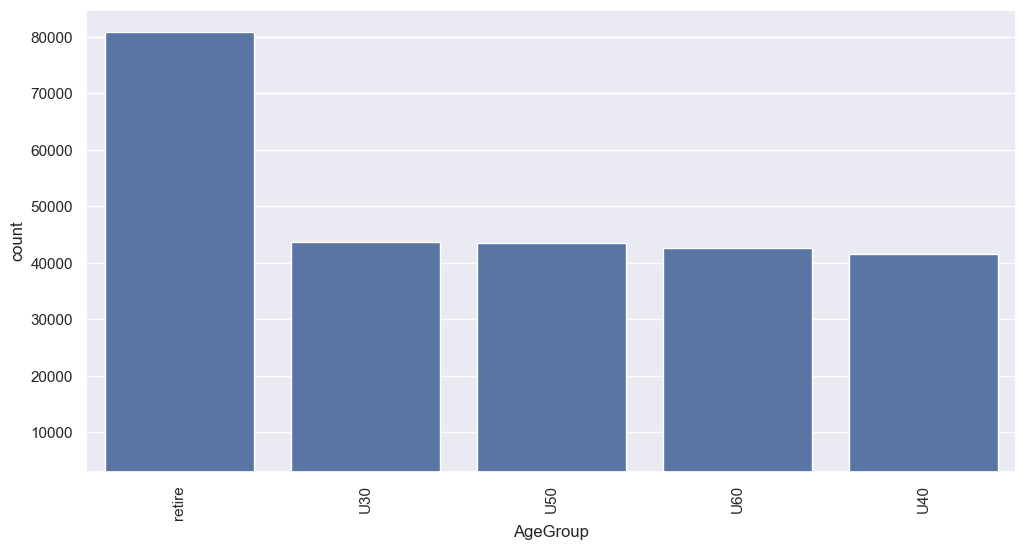

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(x='AgeGroup', data=dfage, order = dfage['AgeGroup'].value_counts().index)
plt.xticks(rotation=90)
plt.ylim(3000)

<Axes: xlabel='Age'>

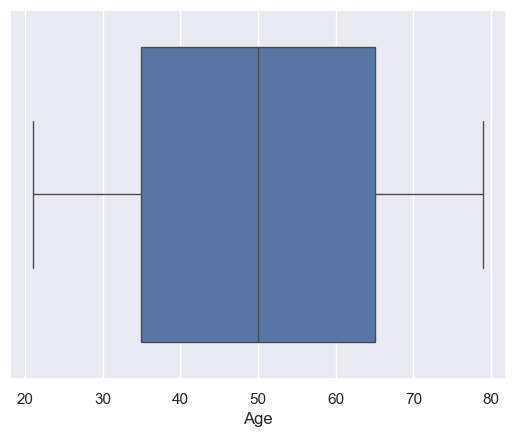

In [29]:
sns.boxplot(x='Age', data=df)

Tidak terdapat pola menarik dari kolom age. terlihat dari grafik, 3 umur terbanyak pada data dimiliki oleh umur 27, 66, dan 48. Tidak terdapat keterkaitan antara umur muda dan tua pada dataset loan prediction. Jelas pada boxplot tidak terlihat adanya outliers

#### Id

In [30]:
print(df['Id'].head())
print(df['Id'].nunique())

0    1
1    2
2    3
3    4
4    5
Name: Id, dtype: int64
252000


Tindak lanjut: Menghapus feature Id karena perbedaan data sangat bervariasi

#### Income

C:\Users\Asus\AppData\Local\Temp\ipykernel_13964\286551982.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Income'], shade=True)


<Axes: xlabel='Income', ylabel='Density'>

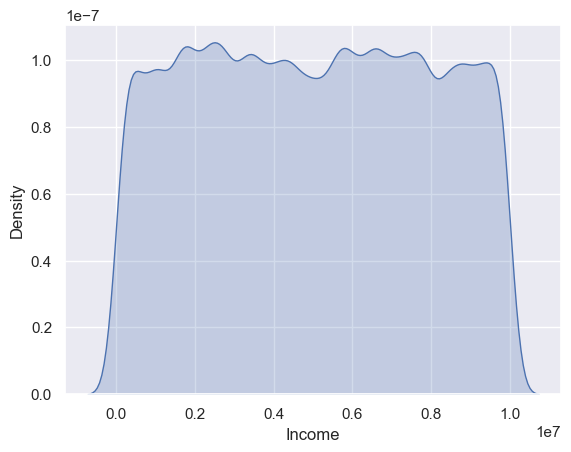

In [31]:
sns.kdeplot(df['Income'], shade=True)

<Axes: ylabel='Income'>

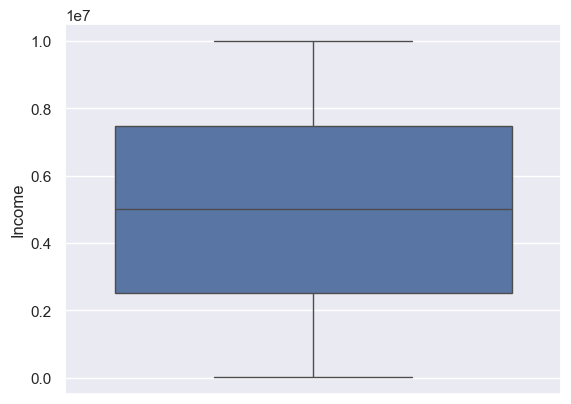

In [32]:
sns.boxplot(df['Income'])

Persebaran data pada feature Income terdistirbusi bell curved, sehingga fitur ini bisa digunakan. Tidak terdapat outliers pada feature Income menunjukan persebaran data normal

#### Experience

In [33]:
dfexp = df[['Experience']]
dfexp['ExperienceGroup'] = dfexp['Experience'].apply(lambda x: 'New' if x<=5 else 'newIntermediate' if x<=10 else 'IntermediateAdvance' if x<=15 else 'Advance')

C:\Users\Asus\AppData\Local\Temp\ipykernel_13964\2107085506.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfexp['ExperienceGroup'] = dfexp['Experience'].apply(lambda x: 'New' if x<=5 else 'newIntermediate' if x<=10 else 'IntermediateAdvance' if x<=15 else 'Advance')


([0, 1, 2, 3],
 [Text(0, 0, 'New'),
  Text(1, 0, 'newIntermediate'),
  Text(2, 0, 'IntermediateAdvance'),
  Text(3, 0, 'Advance')])

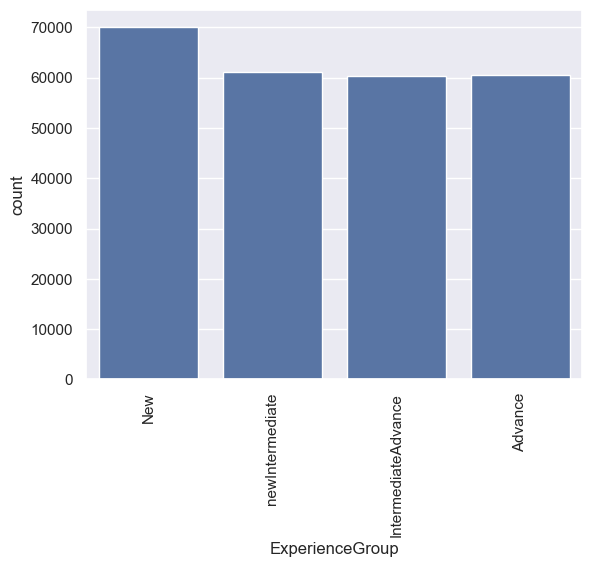

In [34]:
sns.countplot(x='ExperienceGroup', data=dfexp)
plt.xticks(rotation=90)

<Axes: ylabel='Experience'>

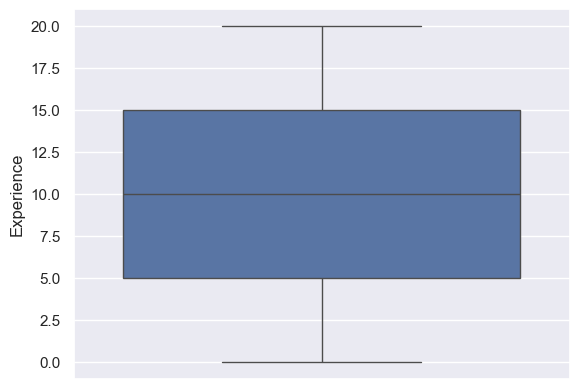

In [35]:
sns.boxplot(df['Experience'])

Persebaran data pada feature Experience terdistirbusi bell curved, sehingga fitur ini bisa digunakan. Pada data ini terlihat lama pengalaman bekerja berpengaruh. terlihat cusomter yang memiliki pengalaman yang lebih sedikit lebih mendominasi

#### Married/Single

<Axes: xlabel='Married/Single', ylabel='count'>

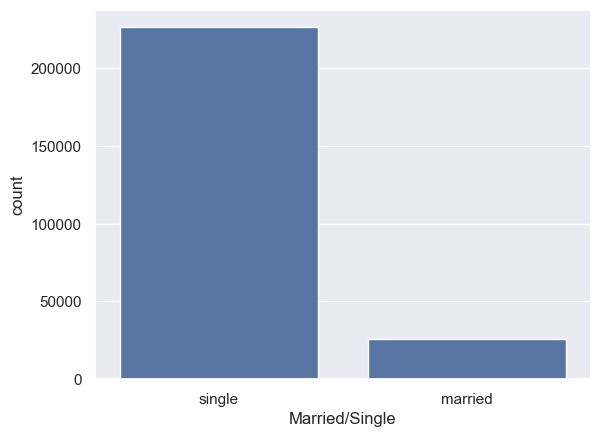

In [37]:
sns.countplot(x='Married/Single', data=df)

In [38]:
df['Married/Single'].value_counts(normalize=True)

Married/Single
single     0.897905
married    0.102095
Name: proportion, dtype: float64

dapat terlihat jumlah customer yang masih single jumlahnya melebihi customer yang berstatus married hampir mencapai 9 kali.

#### House Ownership

In [39]:
df['House_Ownership'].value_counts(normalize=True)

House_Ownership
rented          0.920230
owned           0.051262
norent_noown    0.028508
Name: proportion, dtype: float64

<Axes: xlabel='House_Ownership', ylabel='count'>

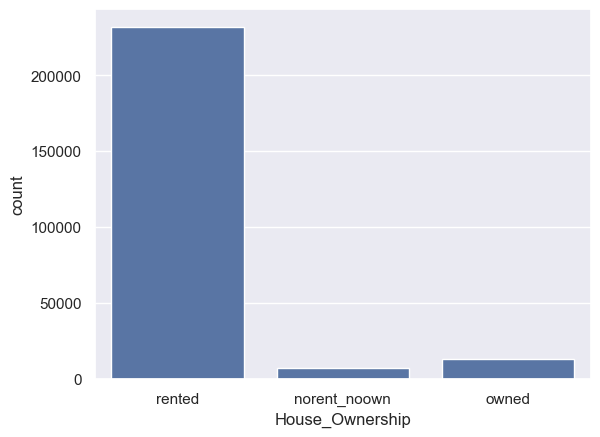

In [40]:
sns.countplot(x='House_Ownership', data=df)

92% customer masih menyewa rumah

#### Car Owndership

In [41]:
df['Car_Ownership'].value_counts(normalize=True)

Car_Ownership
no     0.698413
yes    0.301587
Name: proportion, dtype: float64

<Axes: xlabel='count', ylabel='Car_Ownership'>

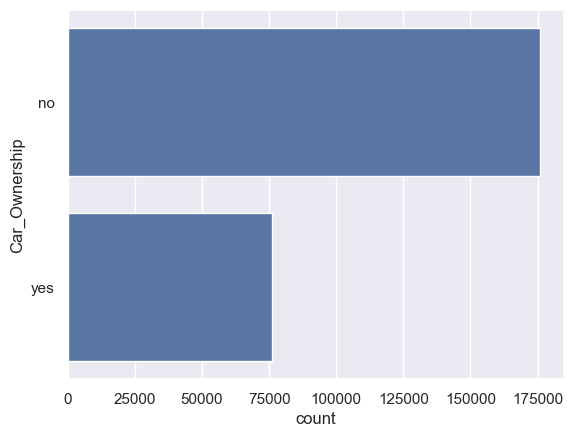

In [42]:
sns.countplot(df['Car_Ownership'])

Perbedaan jumlah pemilik Mobil memiliki perbandingan 60:30. kebanyakan dari customer tidak memiliki mobil

#### Profession

In [43]:
keys = ['Physician', 'Statistician', 'Web_designer', 'Psychologist', 'Computer_hardware_engineer']
val = [5957, 5806, 5397, 5390, 5372]

([<matplotlib.patches.Wedge at 0x1a6a8170150>,
 [Text(0.8620392179006343, 0.6832923143144981, 'Physician'),
  Text(-0.45148448930508206, 1.0030761466194524, 'Statistician'),
  Text(-1.0930308715449037, -0.12362650949447766, 'Web_designer'),
  Text(-0.2662688587061913, -1.0672866976043984, 'Psychologist'),
  Text(0.905114568031031, -0.6251140845781676, 'Computer_hardware_engineer')])

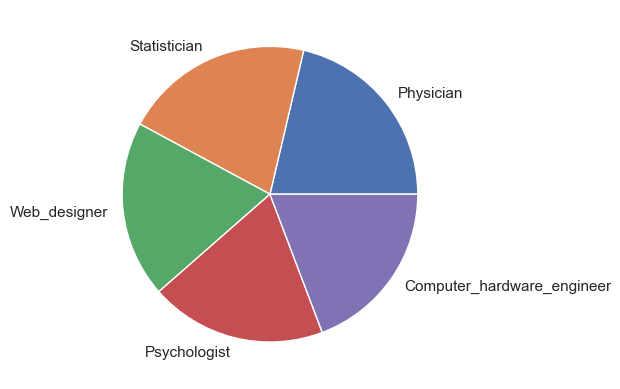

In [44]:
plt.pie(val, labels=keys)

5 Pekerjaan terbanyak tidak memiliki perbedaan jumlah customer yang besar, begitu pula pada pekerjaan lain. features ini tersebar secara merata tanpa ada ketimpangan jumlah yang masif

#### City

In [45]:
df['CITY'].value_counts().head()

CITY
Vijayanagaram    1259
Bhopal           1208
Bulandshahr      1185
Saharsa[29]      1180
Vijayawada       1172
Name: count, dtype: int64

<Axes: xlabel='CITY', ylabel='count'>

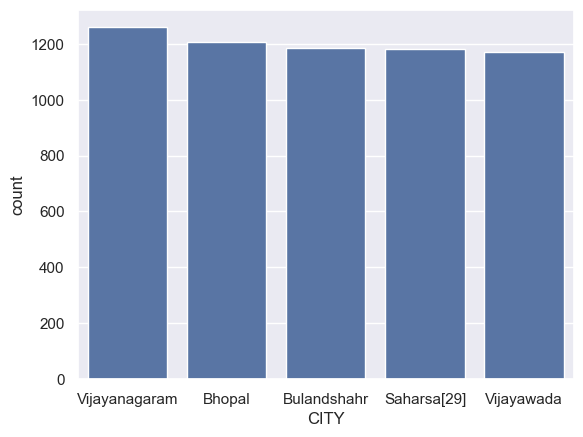

In [46]:
sns.barplot(df['CITY'].value_counts().head())

5 kota dengan cusstomer tertinggi adalah Vijayanagaram, Bhopal, Bulandshahr city, saharsa, vijayawada. namun perbedaannya tidak terlalu signifikan

#### State

<Axes: xlabel='STATE', ylabel='count'>

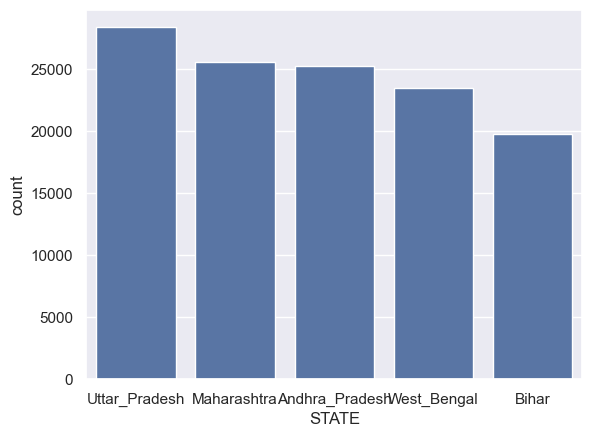

In [48]:
sns.barplot(df['STATE'].value_counts().head())

Perbedaan antar nilai di 5 state tertinggi tidak terlalu timpang, namun pada kolom lain sangat timpang. perlu dilakukan penyesuaian pada state yang sedikit

#### Current Job Years

In [49]:
df['CURRENT_JOB_YRS'].value_counts()

CURRENT_JOB_YRS
3     29460
4     28339
5     25091
6     23491
7     19925
8     18874
9     17132
10    15768
11    13595
1     11575
2     11087
0     11043
12    10605
13     9099
14     6916
Name: count, dtype: int64

<Axes: xlabel='CURRENT_JOB_YRS', ylabel='count'>

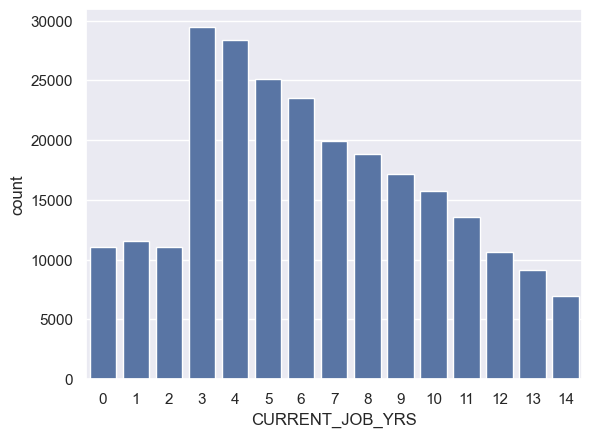

In [50]:
sns.countplot(x = 'CURRENT_JOB_YRS', data = df)

Modus terdapat pada tahun ke 3, tidak diperlukan adanya perubahan

#### Current House Yeaer

In [51]:
df['CURRENT_HOUSE_YRS'].value_counts()

CURRENT_HOUSE_YRS
11    51873
12    51791
13    50659
14    49003
10    48674
Name: count, dtype: int64

<Axes: xlabel='CURRENT_HOUSE_YRS', ylabel='count'>

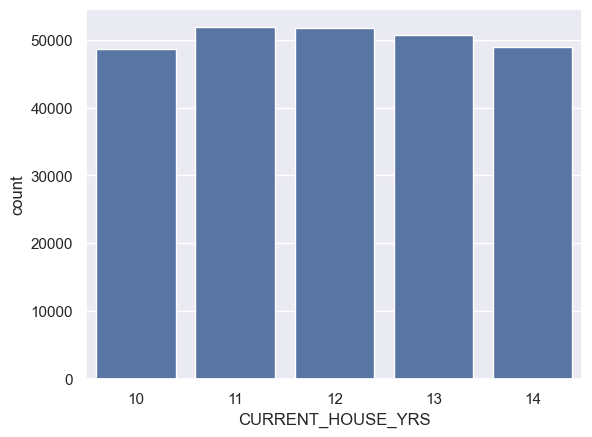

In [52]:
sns.countplot(x = 'CURRENT_HOUSE_YRS', data = df)

Rentang rumah berada pada 10-14 tahun dengan perbedaan yang minim

#### Risk Flag

<Axes: xlabel='Risk_Flag', ylabel='count'>

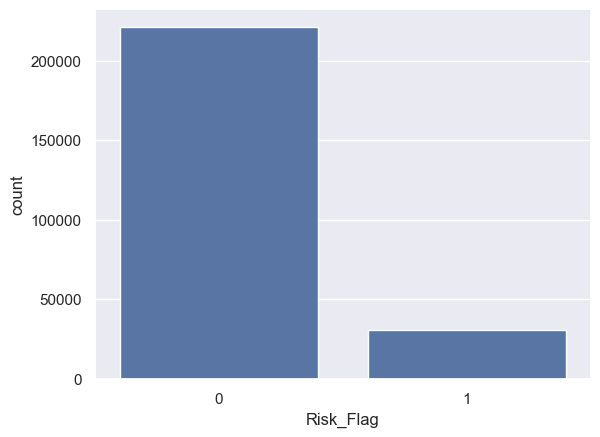

In [53]:
sns.countplot(x = 'Risk_Flag', data = df)

perbedaan antara yang beresiko dan tidak beresiko cukup tinggi, sehingga perlu dilakukan upsampling/undersampling

### Business Insight

In [23]:
def currency_formatter(x, pos):
    if x >= 1e6:
        return '{:1.1f}M'.format(x * 1e-6)
    elif x >= 1e3:
        return '{:1.0f}k'.format(x * 1e-3)
    else:
        return '{:1.0f}'.format(x)

formatter = FuncFormatter(currency_formatter)

In [24]:
# import matplotlib.colors as mcolors

# def palette_to_hex(palette, seq, index=0):
#     c = sns.color_palette(palette, seq)
#     hex_c = mcolors.to_hex(c[index])
#     return c, hex_c

# c, h = palette_to_hex('cividis', 2, 1)
# h

In [25]:
ls_color = ['#575d6d', '#a59c74']

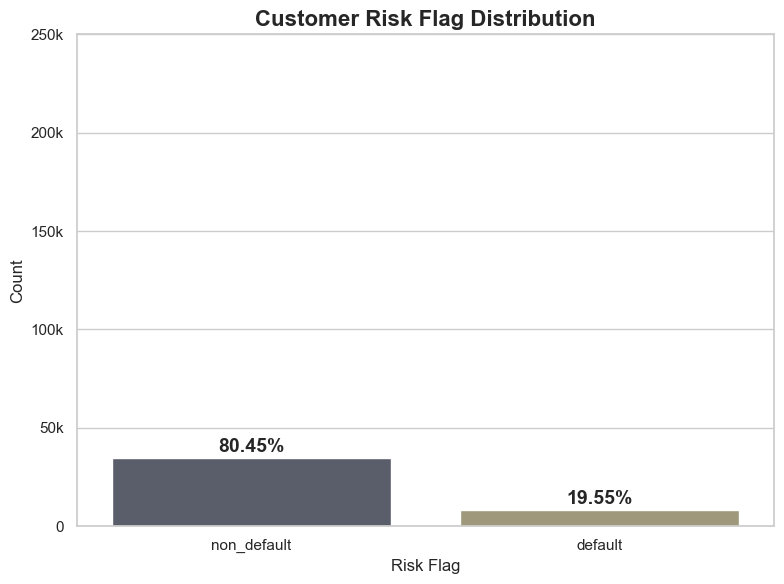

In [26]:
plt.figure(figsize=(8,6))

ax = sns.countplot(x='risk_flag', palette='cividis', data=df)
ax.yaxis.set_major_formatter(formatter)
plt.title('Customer Risk Flag Distribution',
          fontdict={'fontsize':16, 'fontweight':'bold'},
          loc='center')
plt.xlabel('Risk Flag')
plt.ylabel('Count')
plt.xticks(ticks=[0,1], labels=['non_default', 'default'])
plt.ylim(0,250000)

total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2.,
            y=height + 3000,
            s='{:.2f}%'.format((height / total) * 100),
            fontdict={'fontsize':14, 'fontweight':'bold'},
            ha='center')

plt.tight_layout()
plt.show()

Berdasarkan data historis, terdapat perbedaan proporsi yang signifikan antara dua kelompok pelanggan yang pernah mengalami gagal bayar (default) dan yang berhasil membayar (non-default). Perbedaan ini dapat menjadi indikasi bahwa ada faktor-faktor tertentu yang mempengaruhi kemungkinan seseorang mengalami gagal bayar.

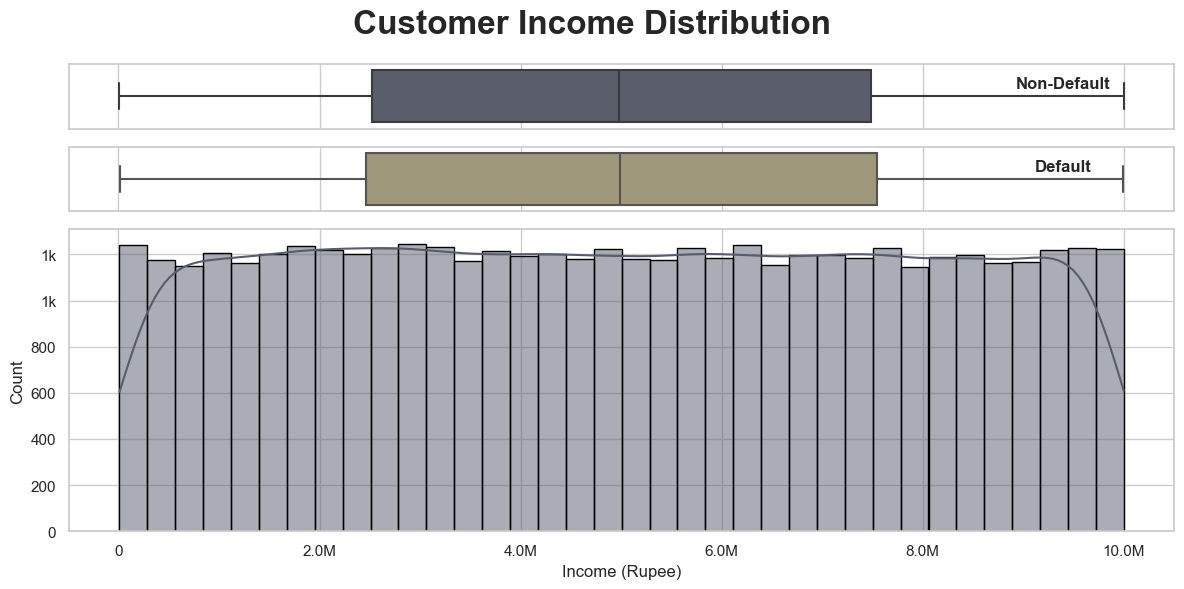

In [27]:
fig, ax = plt.subplots(3, 1, figsize=(12,6), sharex=True,
                       gridspec_kw={"height_ratios": (.15, .15, .7)})

sns.boxplot(x='income', color='#575d6d', data=df[df['risk_flag']==0], ax=ax[0])
ax[0].set_xlabel(None)
ax[0].text(0.9, 0.7, 'Non-Default', fontweight='bold', horizontalalignment='center', verticalalignment='center', transform=ax[0].transAxes)

sns.boxplot(x='income', color='#a59c74', data=df[df['risk_flag']==1], ax=ax[1])
ax[1].set_xlabel(None)
ax[1].text(0.9, 0.7, 'Default', fontweight='semibold', horizontalalignment='center', verticalalignment='center', transform=ax[1].transAxes)

sns.histplot(x='income', color='#575d6d', edgecolor='black', kde=True, data=df, ax=ax[2])
ax[2].xaxis.set_major_formatter(formatter)
ax[2].yaxis.set_major_formatter(formatter)
ax[2].set_xlabel('Income (Rupee)')
ax[2].set_ylabel('Count')

plt.suptitle(t='Customer Income Distribution',
             fontsize=24, fontweight='bold')
plt.tight_layout()
plt.show()

In [28]:
iqr_0 = df[df['risk_flag']==0]['income'].quantile(0.75) - df[df['risk_flag']==0]['income'].quantile(0.25)
iqr_1 = df[df['risk_flag']==1]['income'].quantile(0.75) - df[df['risk_flag']==1]['income'].quantile(0.25)

print(f'IQR untuk customer yang non-default: {iqr_0}')
print(f'IQR untuk customer yang default: {iqr_1}')

IQR untuk customer yang non-default: 4960173.0
IQR untuk customer yang default: 5081621.0


Distribusi income (pendapatan) dari pelanggan terlihat cukup merata dan cenderung seragam. Hal ini menunjukkan bahwa sebagian besar pelanggan memiliki pendapatan yang relatif serupa tanpa adanya outlier yang signifikan atau dominasi pada rentang tertentu. Selain itu, melalui analisis boxplot, dapat dilihat bahwa rentang interkuartil (IQR) untuk kelompok customer yang mengalami default lebih besar daripada yang tidak mengalami default. Hal ini menunjukkan bahwa variasi dalam pendapatan para customer yang mengalami default lebih besar dibandingkan dengan yang tidak mengalami default. Hal ini mungkin menandakan bahwa di antara customer yang mengalami default, ada variasi yang lebih besar dalam kondisi keuangan mereka, yang mungkin menjadi faktor yang berkontribusi pada kecenderungan default. Di sisi lain, kelompok customer yang tidak mengalami default cenderung memiliki pendapatan yang lebih stabil, yang mencerminkan stabilitas finansial mereka dan kecenderungan yang lebih rendah untuk mengalami kesulitan dalam pembayaran. Selain itu, perlu dicatat bahwa kuartil pertama (Q1) untuk kelompok customer yang mengalami default lebih rendah daripada yang tidak mengalami default, tetapi kuartil ketiga (Q3) untuk kelompok pelanggan yang mengalami default lebih tinggi dari yang tidak mengalami default.

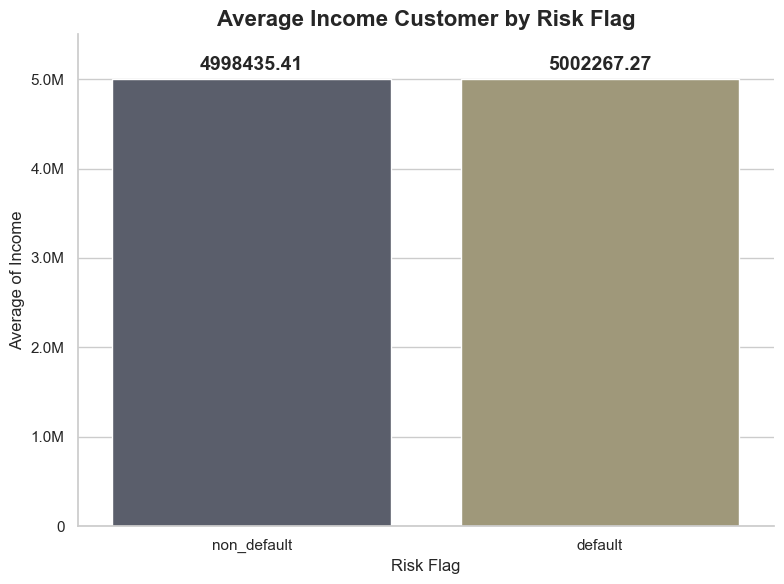

In [29]:
plt.figure(figsize=(8,6))

ax = sns.barplot(x='risk_flag', y='income', palette='cividis', errorbar=None, data=df)
ax.yaxis.set_major_formatter(formatter)
plt.title('Average Income Customer by Risk Flag',
          fontdict={'fontsize':16, 'fontweight':'bold'},
          loc='center')
plt.xlabel('Risk Flag')
plt.xticks(ticks=[0,1], labels=['non_default', 'default'])
plt.ylabel('Average of Income')
plt.ylim(0, 5500000)

for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2,
            y=height + 100000,
            s=round(height, 2),
            fontdict={'fontsize':14, 'fontweight':'bold'},
            ha='center')

sns.despine()
plt.tight_layout()
plt.show()

Dari barplot diperoleh bahwa tidak ada perbedaan yang siginfikan antara rata-rata pendapatan customer yang pernah mengalami gagal bayar (default) dan tidak pernah gagal bayar (non-default). Walaupun demikian, diketahui bahwa customer yang non-default memiliki rata-rata pendapatan yang lebih besar dibandingkan customer yang pernah default.

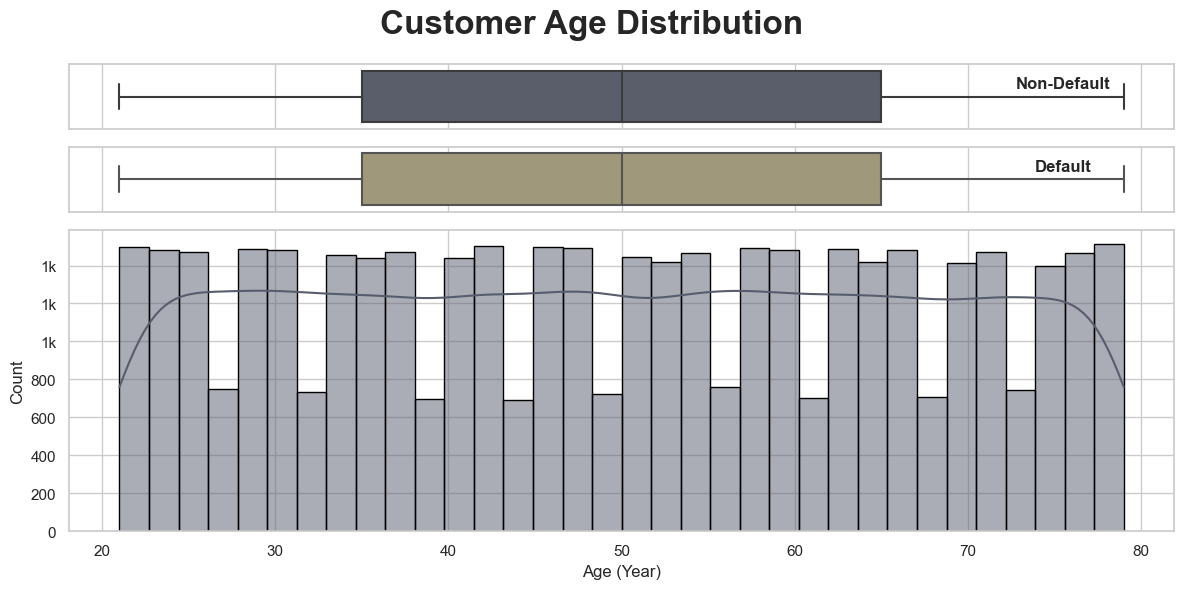

In [30]:
fig, ax = plt.subplots(3, 1, figsize=(12,6), sharex=True,
                       gridspec_kw={"height_ratios": (.15, .15, .7)})

sns.boxplot(x='age', color='#575d6d', data=df[df['risk_flag']==0], ax=ax[0])
ax[0].set_xlabel(None)
ax[0].text(0.9, 0.7, 'Non-Default', fontweight='semibold', horizontalalignment='center', verticalalignment='center', transform=ax[0].transAxes)

sns.boxplot(x='age', color='#a59c74', data=df[df['risk_flag']==1], ax=ax[1])
ax[1].set_xlabel(None)
ax[1].text(0.9, 0.7, 'Default', fontweight='semibold', horizontalalignment='center', verticalalignment='center', transform=ax[1].transAxes)

sns.histplot(x='age', color='#575d6d', edgecolor='black', kde=True, data=df, ax=ax[2])
ax[2].xaxis.set_major_formatter(formatter)
ax[2].yaxis.set_major_formatter(formatter)
ax[2].set_xlabel('Age (Year)')
ax[2].set_ylabel('Count')

plt.suptitle(t='Customer Age Distribution',
             fontsize=24, fontweight='bold')
plt.tight_layout()
plt.show()

Dari grafik, terlihat bahwa rentang usia pelanggan berkisar antara 20 hingga 80 tahun, dengan persebaran yang cukup merata dan tanpa adanya outlier yang signifikan. Selain itu, berdasarkan distribusi usia antara kelompok pelanggan yang mengalami default dan yang tidak, dapat diamati bahwa kuartil pertama (Q1), kuartil kedua (Q2), dan kuartil ketiga (Q3) untuk kelompok pelanggan yang mengalami default cenderung lebih rendah dibandingkan dengan kelompok pelanggan yang tidak mengalami default. Hal ini menunjukkan bahwa, secara umum, kelompok pelanggan yang mengalami default memiliki usia yang lebih muda daripada kelompok pelanggan yang tidak mengalami default. Namun, untuk mendapatkan pemahaman yang lebih mendalam, perlu dilakukan analisis lebih lanjut terhadap faktor-faktor lain yang mungkin memengaruhi kecenderungan default pada rentang usia tertentu.

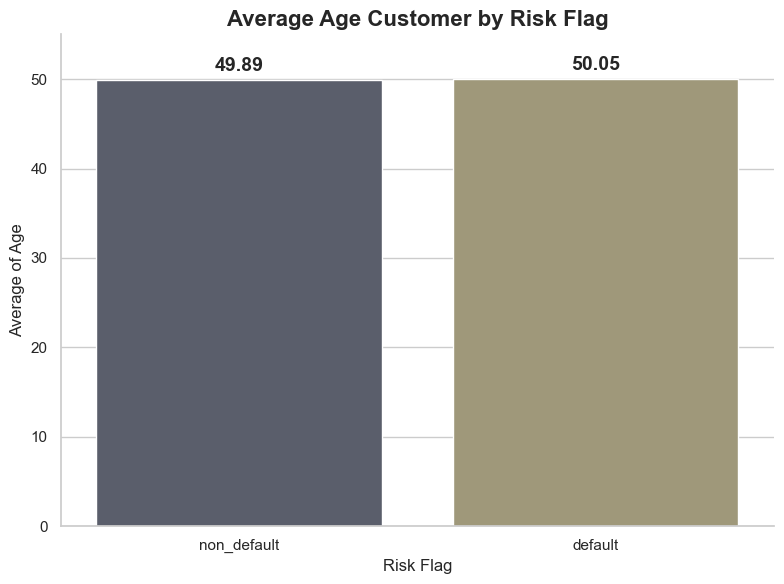

In [31]:
plt.figure(figsize=(8,6))

ax = sns.barplot(x='risk_flag', y='age', palette='cividis', errorbar=None, data=df)
ax.yaxis.set_major_formatter(formatter)
plt.title('Average Age Customer by Risk Flag',
          fontdict={'fontsize':16, 'fontweight':'bold'},
          loc='center')
plt.xlabel('Risk Flag')
plt.xticks(ticks=[0,1], labels=['non_default', 'default'])
plt.ylabel('Average of Age')
plt.ylim(0, 55)

for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2,
            y=height + 1,
            s=round(height, 2),
            fontdict={'fontsize':14, 'fontweight':'bold'},
            ha='center')

sns.despine()
plt.tight_layout()
plt.show()

Rata-rata usia kelompok customer yang pernah default cenderung lebih muda dibandingkan dengan kelompok customer yang tidak pernah default. Walaupun demikian, perbedaan rata-rata tersebut tidaklah cukup signifikan, tetapi hasil ini sesuai dengan penemuan sebelumnya bahwa kelompok customer yang mengalami default memiliki usia yang lebih muda daripada kelompok customer yang tidak mengalami default.

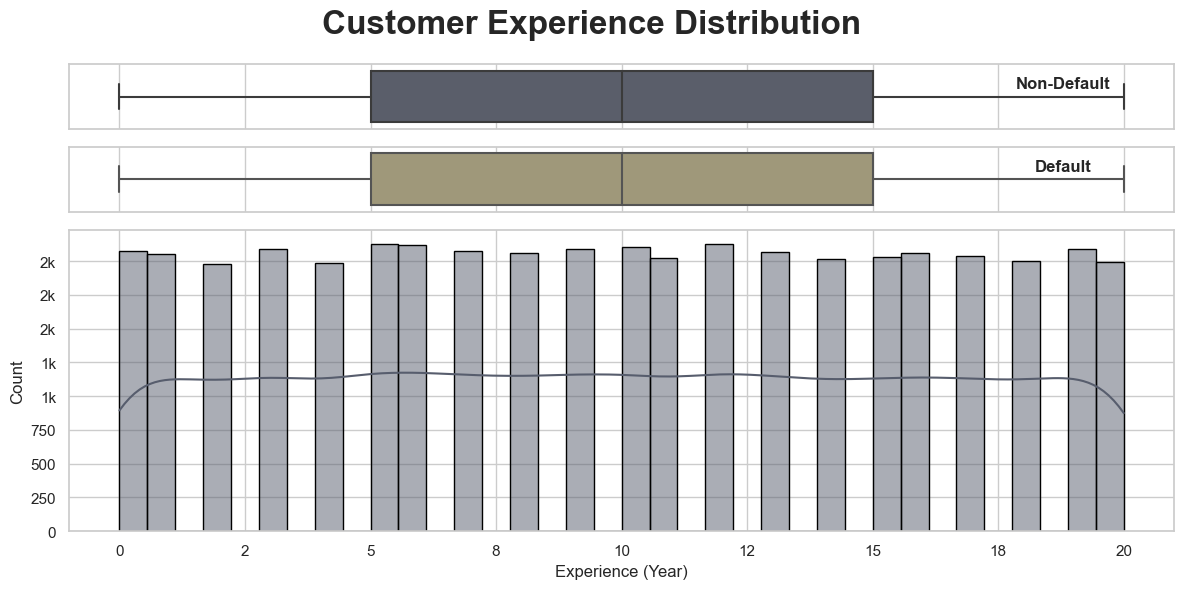

In [32]:
fig, ax = plt.subplots(3, 1, figsize=(12,6), sharex=True,
                       gridspec_kw={"height_ratios": (.15, .15, .7)})

sns.boxplot(x='experience', color='#575d6d', data=df[df['risk_flag']==0], ax=ax[0])
ax[0].set_xlabel(None)
ax[0].text(0.9, 0.7, 'Non-Default', fontweight='semibold', horizontalalignment='center', verticalalignment='center', transform=ax[0].transAxes)

sns.boxplot(x='experience', color='#a59c74', data=df[df['risk_flag']==1], ax=ax[1])
ax[1].set_xlabel(None)
ax[1].text(0.9, 0.7, 'Default', fontweight='semibold', horizontalalignment='center', verticalalignment='center', transform=ax[1].transAxes)

sns.histplot(x='experience', color='#575d6d', edgecolor='black', kde=True, data=df, ax=ax[2])
ax[2].xaxis.set_major_formatter(formatter)
ax[2].yaxis.set_major_formatter(formatter)
ax[2].set_xlabel('Experience (Year)')
ax[2].set_ylabel('Count')

plt.suptitle(t='Customer Experience Distribution',
             fontsize=24, fontweight='bold')
plt.tight_layout()
plt.show()

Pengalaman profesional customer memiliki distribusi persebaran yang cukup merata atau tidak ada perbedaan yang signifikan antar tahun pengalaman profesional. Selain itu, dapa diamatai bahwa Q1 dan Q2 pada kelompok customer yang tidak mengalami default lebih besar dibandingkan customer yang default mengindikasikan bahwa kelompok customer yang tidak mengalami default cenderung memiliki pengalaman profesional lebih dibandingkan kelompok pelanggan yang mengalami default.

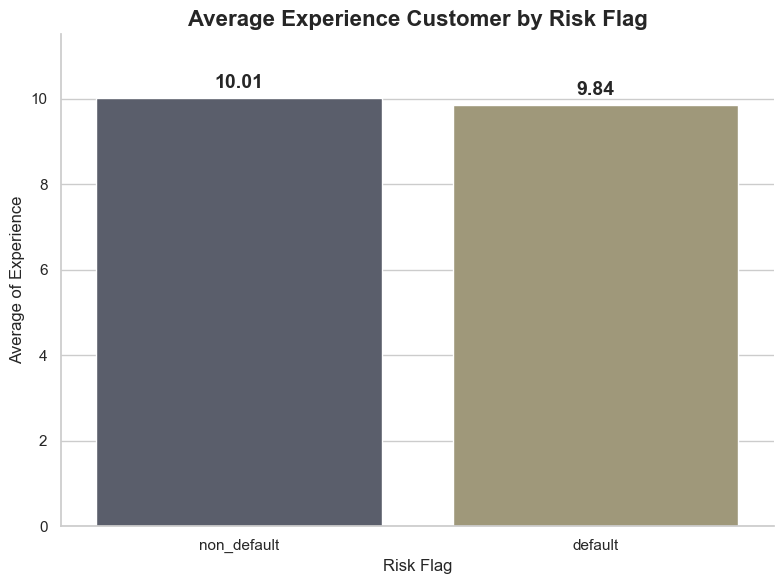

In [33]:
plt.figure(figsize=(8,6))

ax = sns.barplot(x='risk_flag', y='experience', palette='cividis', errorbar=None, data=df)
ax.yaxis.set_major_formatter(formatter)
plt.title('Average Experience Customer by Risk Flag',
          fontdict={'fontsize':16, 'fontweight':'bold'},
          loc='center')
plt.xlabel('Risk Flag')
plt.xticks(ticks=[0,1], labels=['non_default', 'default'])
plt.ylabel('Average of Experience')
plt.ylim(0, 11.5)

for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2,
            y=height + 0.25,
            s=round(height, 2),
            fontdict={'fontsize':14, 'fontweight':'bold'},
            ha='center')

sns.despine()
plt.tight_layout()
plt.show()

Rata-rata pengalaman profesional kelompok customer yang tidak mengalami default memiliki pengalaman yang lebih besar (lebih lama) dibandingkan dengan kelompok customer yang mengalami default.

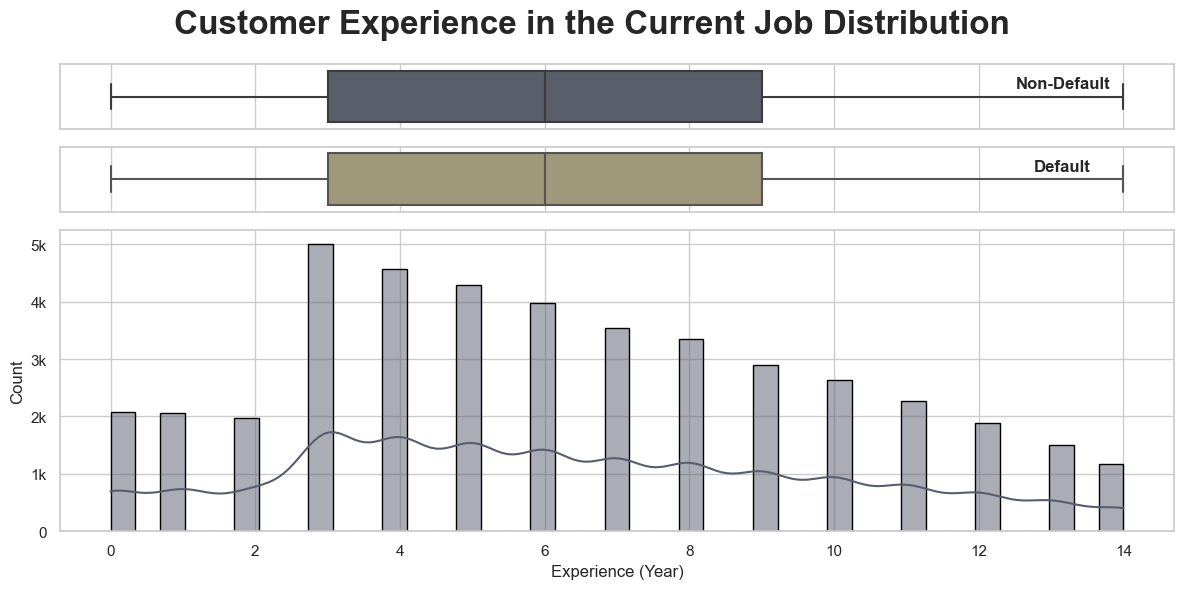

In [34]:
fig, ax = plt.subplots(3, 1, figsize=(12,6), sharex=True,
                       gridspec_kw={"height_ratios": (.15, .15, .7)})

sns.boxplot(x='current_job_yrs', color='#575d6d', data=df[df['risk_flag']==0], ax=ax[0])
ax[0].set_xlabel(None)
ax[0].text(0.9, 0.7, 'Non-Default', fontweight='semibold', horizontalalignment='center', verticalalignment='center', transform=ax[0].transAxes)

sns.boxplot(x='current_job_yrs', color='#a59c74', data=df[df['risk_flag']==1], ax=ax[1])
ax[1].set_xlabel(None)
ax[1].text(0.9, 0.7, 'Default', fontweight='semibold', horizontalalignment='center', verticalalignment='center', transform=ax[1].transAxes)

sns.histplot(x='current_job_yrs', color='#575d6d', edgecolor='black', kde=True, data=df, ax=ax[2])
ax[2].xaxis.set_major_formatter(formatter)
ax[2].yaxis.set_major_formatter(formatter)
ax[2].set_xlabel('Experience (Year)')
ax[2].set_ylabel('Count')

plt.suptitle(t='Customer Experience in the Current Job Distribution',
             fontsize=24, fontweight='bold')
plt.tight_layout()
plt.show()

Sebagian besar customer memiliki pengalaman pada pekerjaan saat ini selama 3 tahun atau lebih. Selain itu, dapat diamati bahwa kuartil pertama (Q1) dari kelompok customer yang mengalami default lebih kecil dibandingkan dengan kelompok customer yang tidak mengalami default. Hal ini mengindikasikan bahwa sebagian besar customer yang mengalami default memiliki pengalaman kerja yang lebih pendek dibandingkan dengan customer yang tidak mengalami default.

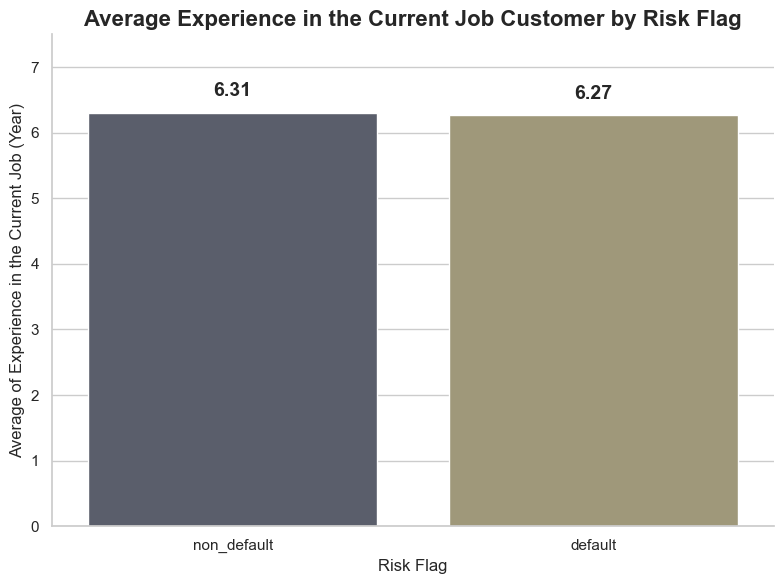

In [35]:
plt.figure(figsize=(8,6))

ax = sns.barplot(x='risk_flag', y='current_job_yrs', palette='cividis', errorbar=None, data=df)
ax.yaxis.set_major_formatter(formatter)
plt.title('Average Experience in the Current Job Customer by Risk Flag',
          fontdict={'fontsize':16, 'fontweight':'bold'},
          loc='center')
plt.xlabel('Risk Flag')
plt.xticks(ticks=[0,1], labels=['non_default', 'default'])
plt.ylabel('Average of Experience in the Current Job (Year)')
plt.ylim(0, 7.5)

for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2,
            y=height + 0.25,
            s=round(height, 2),
            fontdict={'fontsize':14, 'fontweight':'bold'},
            ha='center')

sns.despine()
plt.tight_layout()
plt.show()

Rata-rata lama waktu atau pengalaman pekerjaan saat ini pada kelompok customer yang tidak mengalami default lebih besar (lebih lama) dibandingkan dengan kelompok customer yang mengalami default.

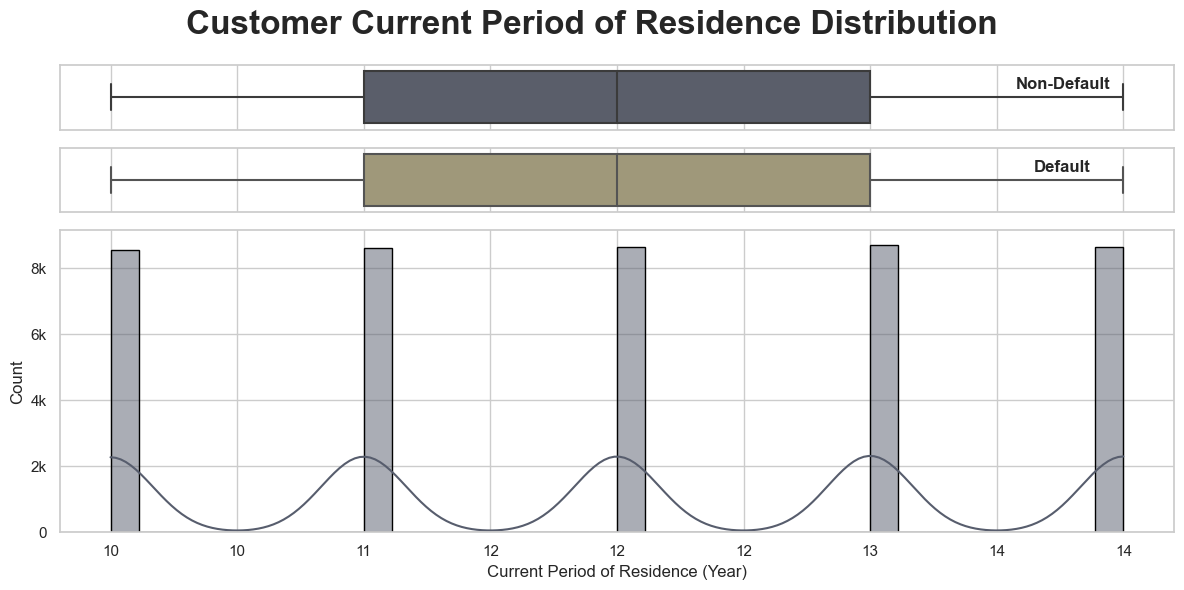

In [36]:
fig, ax = plt.subplots(3, 1, figsize=(12,6), sharex=True,
                       gridspec_kw={"height_ratios": (.15, .15, .7)})

sns.boxplot(x='current_house_yrs', color='#575d6d', data=df[df['risk_flag']==0], ax=ax[0])
ax[0].set_xlabel(None)
ax[0].text(0.9, 0.7, 'Non-Default', fontweight='semibold', horizontalalignment='center', verticalalignment='center', transform=ax[0].transAxes)

sns.boxplot(x='current_house_yrs', color='#a59c74', data=df[df['risk_flag']==1], ax=ax[1])
ax[1].set_xlabel(None)
ax[1].text(0.9, 0.7, 'Default', fontweight='semibold', horizontalalignment='center', verticalalignment='center', transform=ax[1].transAxes)

sns.histplot(x='current_house_yrs', color='#575d6d', edgecolor='black', kde=True, data=df, ax=ax[2])
ax[2].xaxis.set_major_formatter(formatter)
ax[2].yaxis.set_major_formatter(formatter)
ax[2].set_xlabel('Current Period of Residence (Year)')
ax[2].set_ylabel('Count')

plt.suptitle(t='Customer Current Period of Residence Distribution',
             fontsize=24, fontweight='bold')
plt.tight_layout()
plt.show()

Dari grafik, diketahui bahwa jumlah tahun di tempat tinggal saat ini tersebar secara merata. Selain itu, dapat diamati pada boxplot sehingga diperoleh distibrusi kelompok customer yang default dan tidak mengalami default memiliki distribusi yang sama.

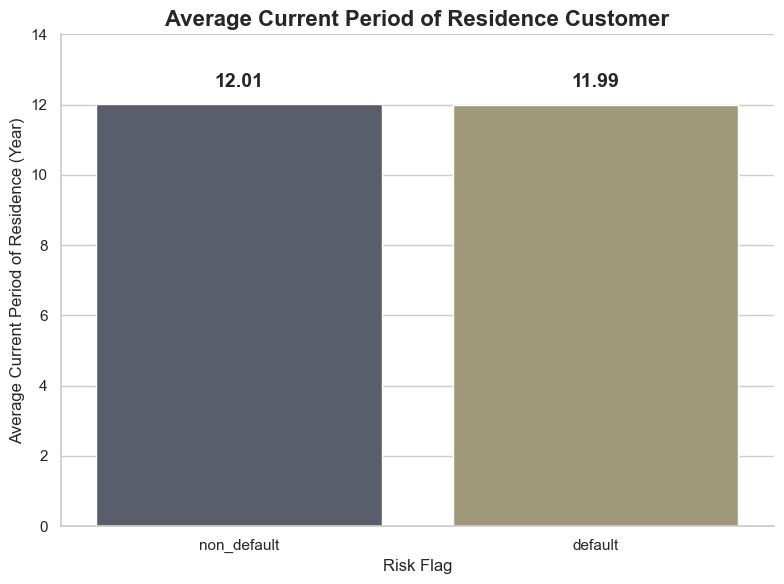

In [37]:
plt.figure(figsize=(8,6))

ax = sns.barplot(x='risk_flag', y='current_house_yrs', palette='cividis', errorbar=None, data=df)
ax.yaxis.set_major_formatter(formatter)
plt.title('Average Current Period of Residence Customer',
          fontdict={'fontsize':16, 'fontweight':'bold'},
          loc='center')
plt.xlabel('Risk Flag')
plt.xticks(ticks=[0,1], labels=['non_default', 'default'])
plt.ylabel('Average Current Period of Residence (Year)')
plt.ylim(0, 14.)

for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2,
            y=height + 0.5,
            s=round(height, 2),
            fontdict={'fontsize':14, 'fontweight':'bold'},
            ha='center')

sns.despine()
plt.tight_layout()
plt.show()

Tidak ada perbedaan rata-rata lama di tempat tinggal saat ini pada kelompok yang default dan non-default.

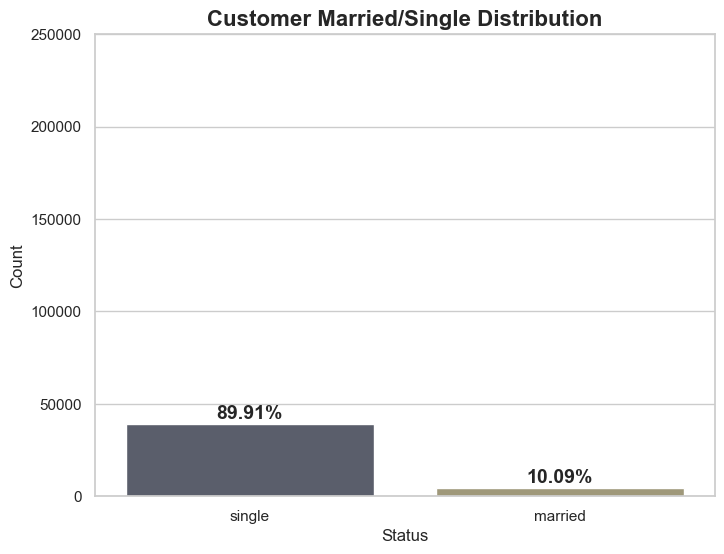

In [38]:
plt.figure(figsize=(8,6))

ax = sns.countplot(x='married_single', palette='cividis', data=df)
plt.title('Customer Married/Single Distribution',
          fontdict={'fontsize':16, 'fontweight':'bold'},
          loc='center')
plt.xlabel('Status')
plt.ylabel('Count')
plt.ylim(0, 250000)

total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2.,
            y=height + 3000,
            s='{:.2f}%'.format((height / total) * 100),
            fontdict={'fontsize':14, 'fontweight':'bold'},
            ha='center')


plt.show()

Mayoritas customer didominasi oleh mereka yang masih belum menikah (single). Hal ini menunjukkan bahwa mayoritas customer dalam dataset masih berstatus single, yang mungkin mengindikasikan bahwa mereka dalam rentang usia yang cenderung lebih muda atau belum menetap dalam hubungan yang stabil. Hipotesisnya bisa saja bahwa customer yang masih single cenderung memiliki tanggung jawab keuangan yang lebih ringan atau lebih fleksibel dalam mengelola keuangan mereka, sehingga lebih cenderung untuk mengambil kredit atau mengalami kesulitan dalam pembayaran.

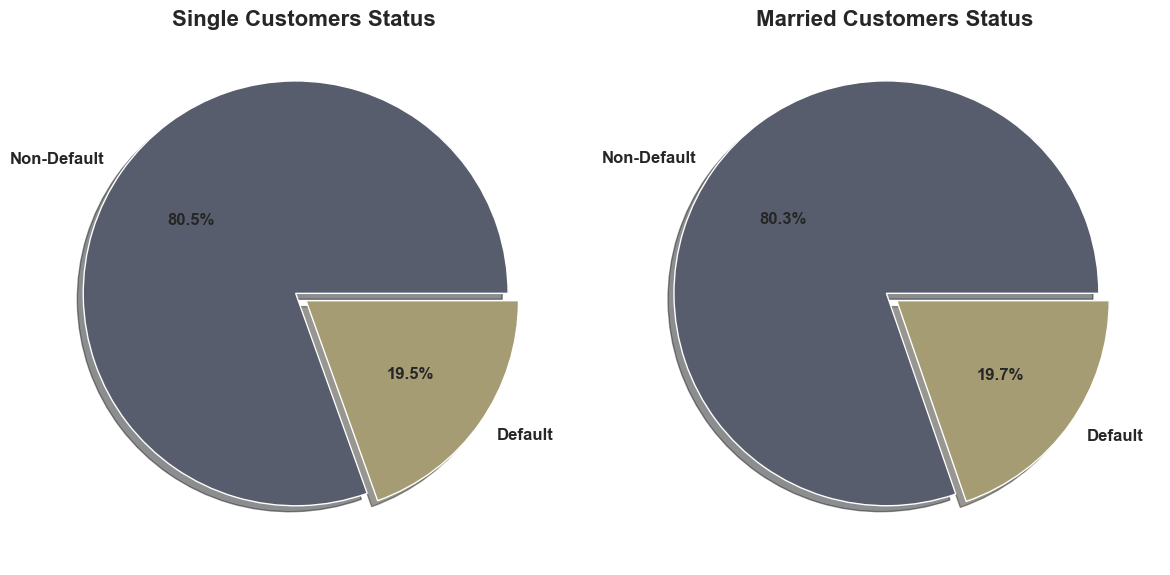

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))

s = df[df['married_single']=='single'].groupby('risk_flag')['risk_flag'].count()
m = df[df['married_single']=='married'].groupby('risk_flag')['risk_flag'].count()

ax[0].pie(s, explode=[0.05, 0.01],
          colors=ls_color, labels=['Non-Default', 'Default'],
          autopct='%1.1f%%', textprops={'fontsize': 12, 'fontweight': 'bold'}, shadow=True);
ax[0].set_title("Single Customers Status",
          fontdict={'fontsize':16, 'fontweight': 'bold'},
          loc='center')

ax[1].pie(m, explode=[0.05, 0.01],
          colors=ls_color, labels=['Non-Default', 'Default'],
          autopct='%1.1f%%', textprops={'fontsize': 12, 'fontweight': 'bold'}, shadow=True);
ax[1].set_title("Married Customers Status",
          fontdict={'fontsize':16, 'fontweight':'bold'},
          loc='center')


plt.tight_layout()
plt.show()

Meskipun mayoritas pelanggan didominasi oleh mereka yang masih single, menurut asumsi bahwa pelanggan yang masih single cenderung memiliki tanggung jawab keuangan yang lebih ringan atau lebih fleksibel dalam mengelola keuangan mereka, sehingga lebih cenderung untuk mengambil kredit atau mengalami kesulitan dalam pembayaran, ternyata proporsi pelanggan yang masih single yang mengalami default lebih besar dibandingkan dengan pelanggan yang sudah menikah.

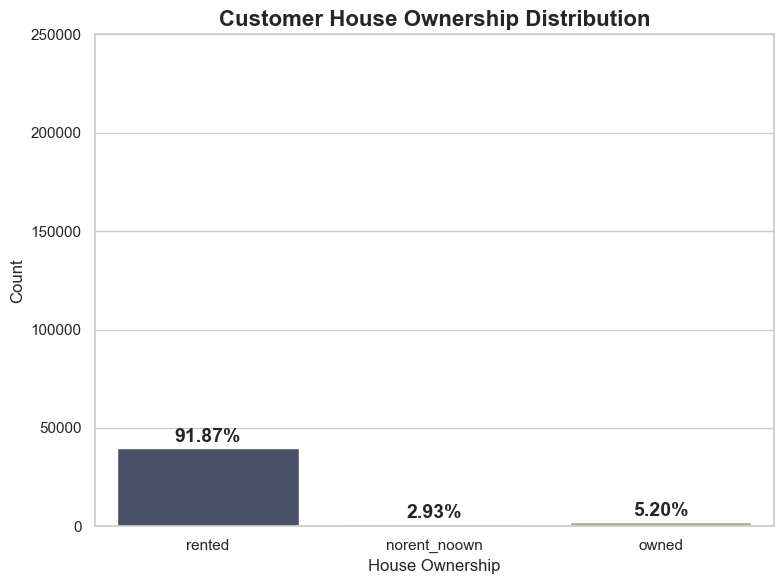

In [40]:
plt.figure(figsize=(8,6))

ax = sns.countplot(x='house_ownership', palette='cividis', data=df)
plt.title('Customer House Ownership Distribution',
          fontdict={'fontsize':16, 'fontweight':'bold'},
          loc='center')
plt.xlabel('House Ownership')
plt.ylabel('Count')
plt.ylim(0, 250000)

total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2.,
            y=height + 3000,
            s='{:.2f}%'.format((height / total) * 100),
            fontdict={'fontsize':14, 'fontweight':'bold'},
            ha='center')

plt.tight_layout()
plt.show()

Mayoritas customer memiliki rumah yang disewa (rented). Ini bisa terjadi karena banyak pelanggan yang mungkin masih berada dalam tahap awal kehidupan mereka atau tinggal di area yang lebih urban di mana kepemilikan rumah mungkin menjadi lebih sulit atau kurang umum. Selain itu, pelanggan yang lebih muda atau yang belum menikah cenderung memilih untuk menyewa rumah sebagai pilihan yang lebih fleksibel daripada memiliki rumah sendiri.

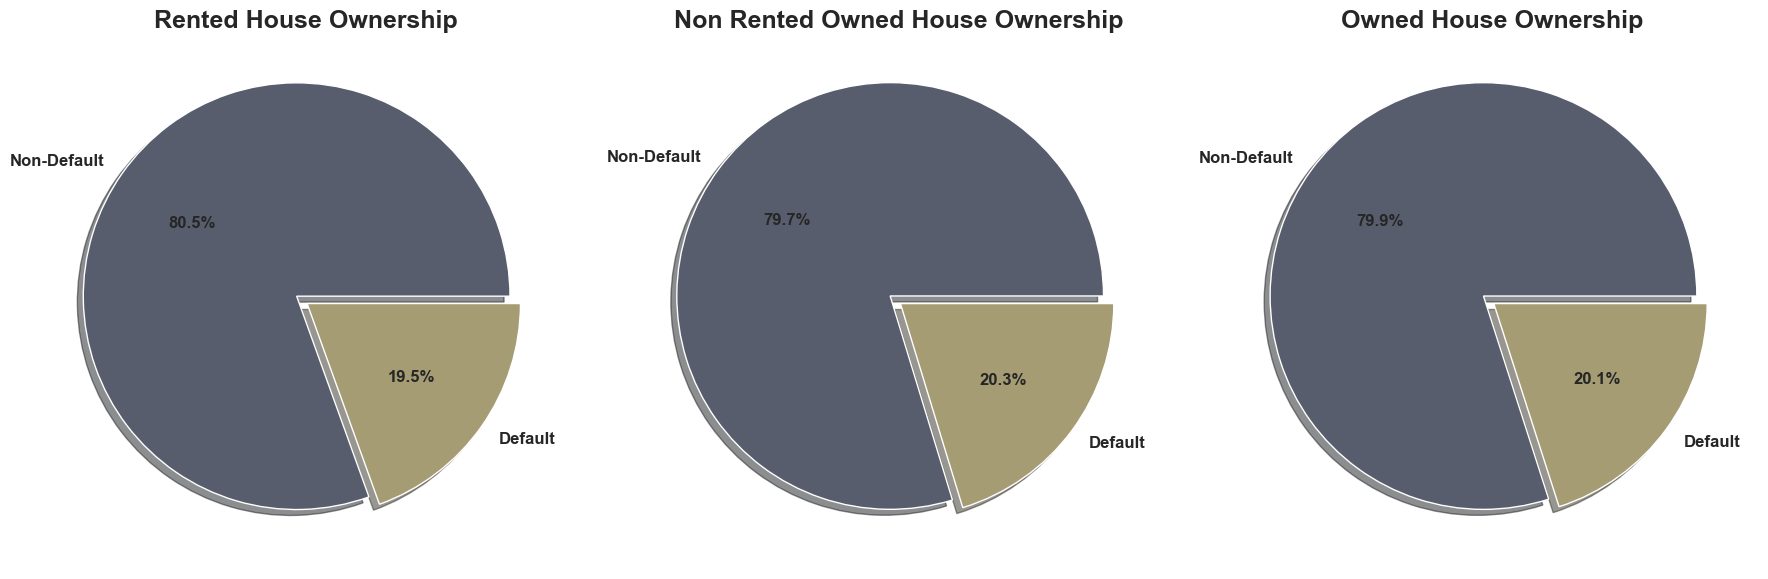

In [41]:
fig, ax = plt.subplots(1, 3, figsize=(18,8))

r = df[df['house_ownership']=='rented'].groupby('risk_flag')['risk_flag'].count()
n = df[df['house_ownership']=='norent_noown'].groupby('risk_flag')['risk_flag'].count()
o = df[df['house_ownership']=='owned'].groupby('risk_flag')['risk_flag'].count()


ax[0].pie(r, explode=[0.05, 0.01],
          colors=ls_color, labels=['Non-Default', 'Default'],
          autopct='%1.1f%%', textprops={'fontsize': 12, 'fontweight': 'bold'}, shadow=True);
ax[0].set_title("Rented House Ownership",
          fontdict={'fontsize':18, 'fontweight': 'bold'},
          loc='center')

ax[1].pie(n, explode=[0.05, 0.01],
          colors=ls_color, labels=['Non-Default', 'Default'],
          autopct='%1.1f%%', textprops={'fontsize': 12, 'fontweight': 'bold'}, shadow=True);
ax[1].set_title("Non Rented Owned House Ownership",
          fontdict={'fontsize':18, 'fontweight':'bold'},
          loc='center')

ax[2].pie(o, explode=[0.05, 0.01],
          colors=ls_color, labels=['Non-Default', 'Default'],
          autopct='%1.1f%%', textprops={'fontsize': 12, 'fontweight': 'bold'}, shadow=True);
ax[2].set_title("Owned House Ownership",
          fontdict={'fontsize':18, 'fontweight':'bold'},
          loc='center')


plt.tight_layout()
plt.show()

Berdasarkan proporsi customer yang default dan non-default untuk tiap kepemilikan rumah, yaitu sewa (rented), tidak memiliki rumah (no rent no own), dan memiliki rumah sendiri (own), diperoleh bahwa customer yang memiliki rumah sewa cenderung lebih berisiko default dibandingkan dengan customer yang tidak memiliki rumah sewa atau memiliki rumah sendiri. Hal ini dapat diamati dari proporsi customer yang default lebih besar untuk customer yang memiliki rumah sewa dibandingkan dengan yang lainnya.

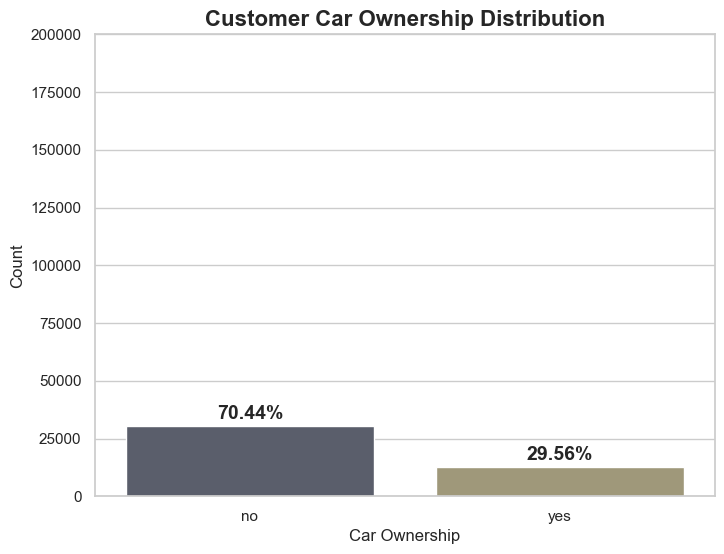

In [42]:
plt.figure(figsize=(8,6))

ax = sns.countplot(x='car_ownership', palette='cividis', data=df)
plt.title('Customer Car Ownership Distribution',
          fontdict={'fontsize':16, 'fontweight':'bold'},
          loc='center')
plt.xlabel('Car Ownership')
plt.ylabel('Count')
plt.ylim(0, 200000)

total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2.,
            y=height + 3000,
            s='{:.2f}%'.format((height / total) * 100),
            fontdict={'fontsize':14, 'fontweight':'bold'},
            ha='center')

plt.show()

Mayoritas customer dalam dataset tidak memiliki mobil. Hal ini mungkin disebabkan oleh beberapa faktor, termasuk preferensi personal, kondisi keuangan, atau ketersediaan transportasi umum yang memadai. Kemungkinan besar, beberapa customer memilih untuk tidak memiliki mobil karena pertimbangan biaya, termasuk pembelian, pemeliharaan, dan asuransi mobil. Selain itu, di beberapa area, transportasi umum mungkin menjadi pilihan yang lebih nyaman atau ekonomis daripada kepemilikan mobil.

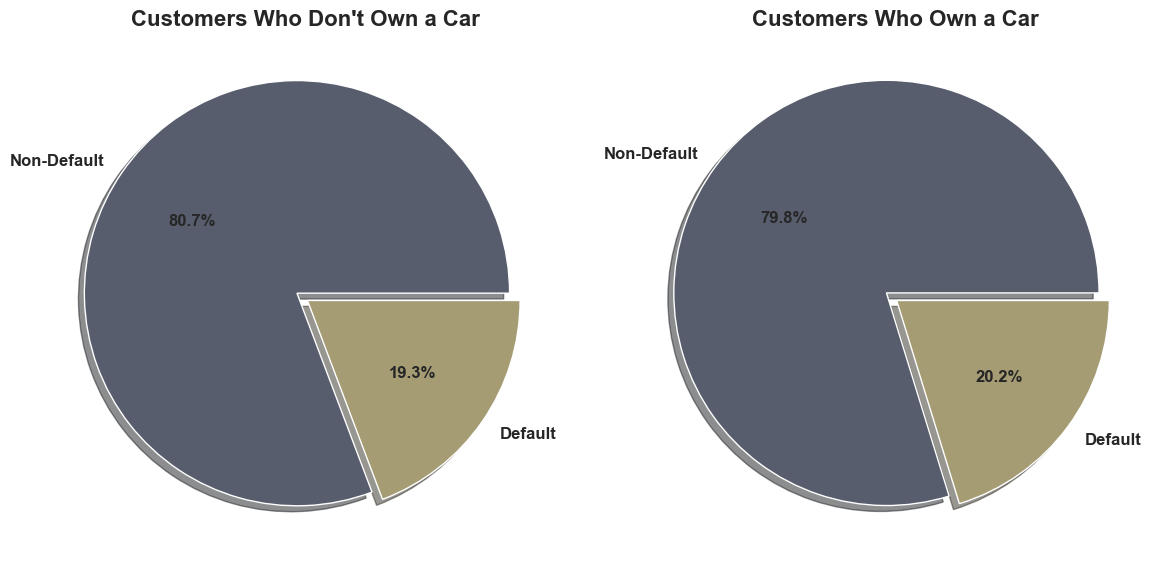

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))

n = df[df['car_ownership']=='no'].groupby('risk_flag')['risk_flag'].count()
y = df[df['car_ownership']=='yes'].groupby('risk_flag')['risk_flag'].count()

ax[0].pie(n, explode=[0.05, 0.01],
          colors=ls_color, labels=['Non-Default', 'Default'],
          autopct='%1.1f%%', textprops={'fontsize': 12, 'fontweight': 'bold'}, shadow=True)
ax[0].set_title("Customers Who Don't Own a Car",
                fontdict={'fontsize':16, 'fontweight': 'bold'},
                loc='center')

ax[1].pie(y, explode=[0.05, 0.01],
          colors=ls_color, labels=['Non-Default', 'Default'],
          autopct='%1.1f%%', textprops={'fontsize': 12, 'fontweight': 'bold'}, shadow=True)
ax[1].set_title("Customers Who Own a Car",
                fontdict={'fontsize':16, 'fontweight':'bold'},
                loc='center')

plt.tight_layout()
plt.show()


Customer yang memiliki mobil cenderung memiliki risiko default yang lebih rendah dibandingkan dengan customer yang tidak memiliki mobil, dengan proporsi customer default pada mereka yang memiliki mobil lebih kecil dibandingkan dengan proporsi default pada mereka yang tidak memiliki mobil.

In [44]:
# profession_mapping = {
#     'mechanical_engineer': 'Engineering',
#     'surveyor': 'Engineering',
#     'design_engineer': 'Engineering',
#     'chemical_engineer': 'Engineering',
#     'biomedical_engineer': 'Engineering',
#     'computer_hardware_engineer': 'Engineering',
#     'petroleum_engineer': 'Engineering',
#     'engineer': 'Engineering',
#     'civil_engineer': 'Engineering',
#     'industrial_engineer': 'Engineering',
#     'technology_specialist': 'Engineering',
#     'software_developer': 'IT/Software',
#     'technical_writer': 'IT/Software',
#     'web_designer': 'IT/Software',
#     'civil_servant': 'Government',
#     'politician': 'Government',
#     'police_officer': 'Government',
#     'magistrate': 'Government',
#     'lawyer': 'Government',
#     'firefighter': 'Government',
#     'official': 'Government',
#     'army_officer': 'Government',
#     'librarian': 'Education',
#     'economist': 'Finance/Accounting',
#     'financial_analyst': 'Finance/Accounting',
#     'chartered_accountant': 'Finance/Accounting',
#     'flight_attendant': 'Aviation',
#     'air_traffic_controller': 'Aviation',
#     'aviator': 'Aviation',
#     'architect': 'Design',
#     'designer': 'Design',
#     'physician': 'Medical Practitioner',
#     'psychologist': 'Medical Practitioner',
#     'surgeon': 'Medical Practitioner',
#     'dentist': 'Medical Practitioner',
#     'hotel_manager': 'Hospitality',
#     'chef': 'Hospitality',
#     'artist': 'Art',
#     'comedian': 'Art',
#     'graphic_designer': 'Design',
#     'fashion_designer': 'Design',
#     'drafter': 'Design',
#     'secretary': 'Administration',
#     'computer_operator': 'Administration',
#     'technician': 'Science/Research',
#     'microbiologist': 'Science/Research',
#     'analyst': 'Science/Research',
#     'geologist': 'Science/Research',
#     'statistician': 'Science/Research',
#     'scientist': 'Science/Research',
#     'consultant': 'Other'
# }

# df['profession_map'] = df['profession'].map(profession_mapping).fillna('Other')

In [45]:
def segment_profession(profession):
    if profession in ['Mechanical_engineer', 'Design_Engineer', 'Chemical_engineer', 'Biomedical_Engineer',
                      'Computer_hardware_engineer', 'Petroleum_Engineer', 'Civil_engineer',
                      'Industrial_Engineer', 'Technology_specialist', 'Surveyor']:
        return 'Engineering'
    elif profession in ['Software_Developer', 'Technical_writer', 'Graphic_Designer', 'Web_designer']:
        return 'IT/Software'
    elif profession in ['Civil_servant', 'Politician', 'Police_officer', 'Magistrate', 'Official', 'Army_officer']:
        return 'Government'
    elif profession in ['Librarian', 'Teacher']:
        return 'Education'
    elif profession in ['Economist', 'Financial_Analyst', 'Chartered_Accountant']:
        return 'Finance/Accounting'
    elif profession in ['Flight_attendant', 'Air_traffic_controller', 'Aviator']:
        return 'Aviation'
    elif profession in ['Architect', 'Designer', 'Fashion_Designer']:
        return 'Design'
    elif profession in ['Physician', 'Dentist', 'Surgeon','Psychologist']:
        return 'Medical Practitioner'
    elif profession in ['Hotel_Manager', 'Chef']:
        return 'Hospitality'
    elif profession in['Comedian', 'Artist']:
        return 'Art'
    elif profession in ['Secretary', 'Computer_operator']:
        return 'Administration'
    elif profession in ['Technician', 'Microbiologist', 'Geologist','Scientist', 'Geologist', 'Statistician','Analyst']:
        return 'Science/Research'
    else:
        return 'Other'

df['profession_map'] = df['profession'].apply(segment_profession)

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_17260\1668539698.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['profession_map'] = df['profession'].apply(segment_profession)


In [9]:
df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [10]:
def segment_state(state):
    if state in ['Rajasthan', 'Maharashtra', 'Gujarat']:
        return 'West Zone'
    elif state in ['Andhra_Pradesh','Kerala', 'Tamil_Nadu', 'Puducherry','Telangana','Karnataka']:
        return 'South Zone'
    elif state in ['Jammu_and_Kashmir','Himachal_Pradesh', 'Punjab','Chandigarh', 'Uttarakhand', 'Haryana','Delhi', 'Uttar_Pradesh','Uttar_Pradesh[5]']:
        return 'North Zone'
    elif state in ['Bihar','West_Bengal','Jharkhand', 'Odisha',]:
        return 'East Zone'
    elif state in ['Chhattisgarh','Madhya_Pradesh']:
        return 'Central Zone'
    elif state in ['Sikkim','Mizoram', 'Manipur','Tripura','Arunachal Pradesh','Assam']:
        return 'North East Zone'
    else:
        return 'Unknown'

df['Zone'] = df['STATE'].apply(segment_state)

In [47]:
df_profession = df['profession_map'].value_counts().reset_index()
df_profession.rename(columns={'index':'profession', 'profession_map':'count'}, inplace=True)

df_city = df['city'].value_counts().reset_index()
df_city.rename(columns={'index':'city', 'city':'count'}, inplace=True)

df_state = df['state'].value_counts().reset_index()
df_state.rename(columns={'index':'state', 'state':'count'}, inplace=True)

df_zone = df['zone'].value_counts().reset_index()
df_zone.rename(columns={'index':'zone', 'zone':'count'}, inplace=True)

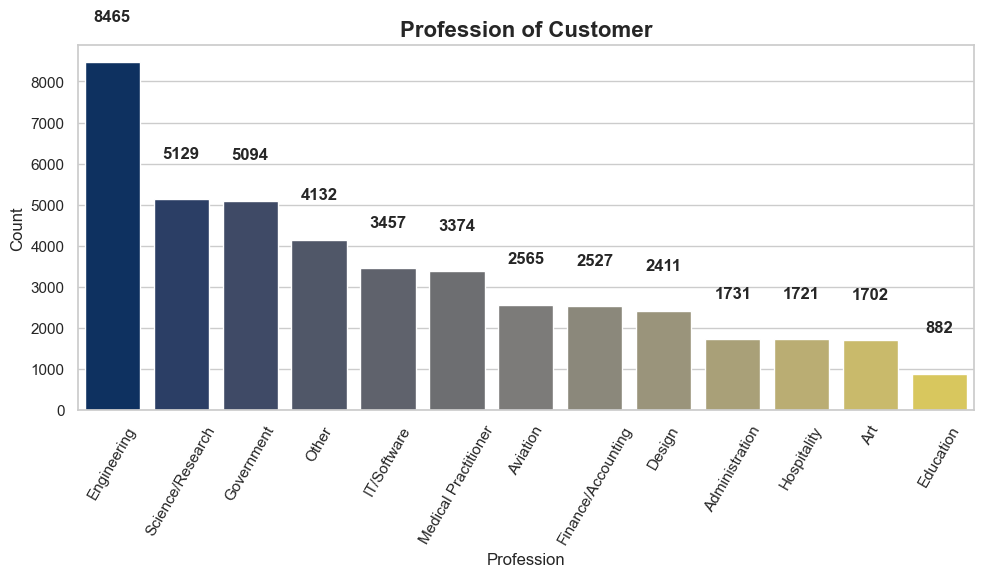

In [48]:
plt.figure(figsize=(10,6))

ax = sns.barplot(x='profession', y='count', palette='cividis', data=df_profession)
plt.title('Profession of Customer',
          fontdict={'fontsize':16, 'fontweight':'bold'},
          loc='center')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.xticks(rotation=60)

for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() /2.,
            y=height + 1000,
            s=int(height),
            fontdict={'fontsize':12, 'fontweight':'bold'},
            ha='center')

plt.tight_layout()
plt.show()

Profesi di bidang teknik (engineering) mendominasi sebagai kategori teratas pada customer, diikuti oleh profesi di sektor pemerintahan (government) dan kategori lainnya. Hal ini menunjukkan bahwa sebagian besar customer dalam dataset memiliki latar belakang atau pekerjaan dalam bidang teknik, diikuti dengan pekerjaan di sektor pemerintahan dan kategori lainnya.

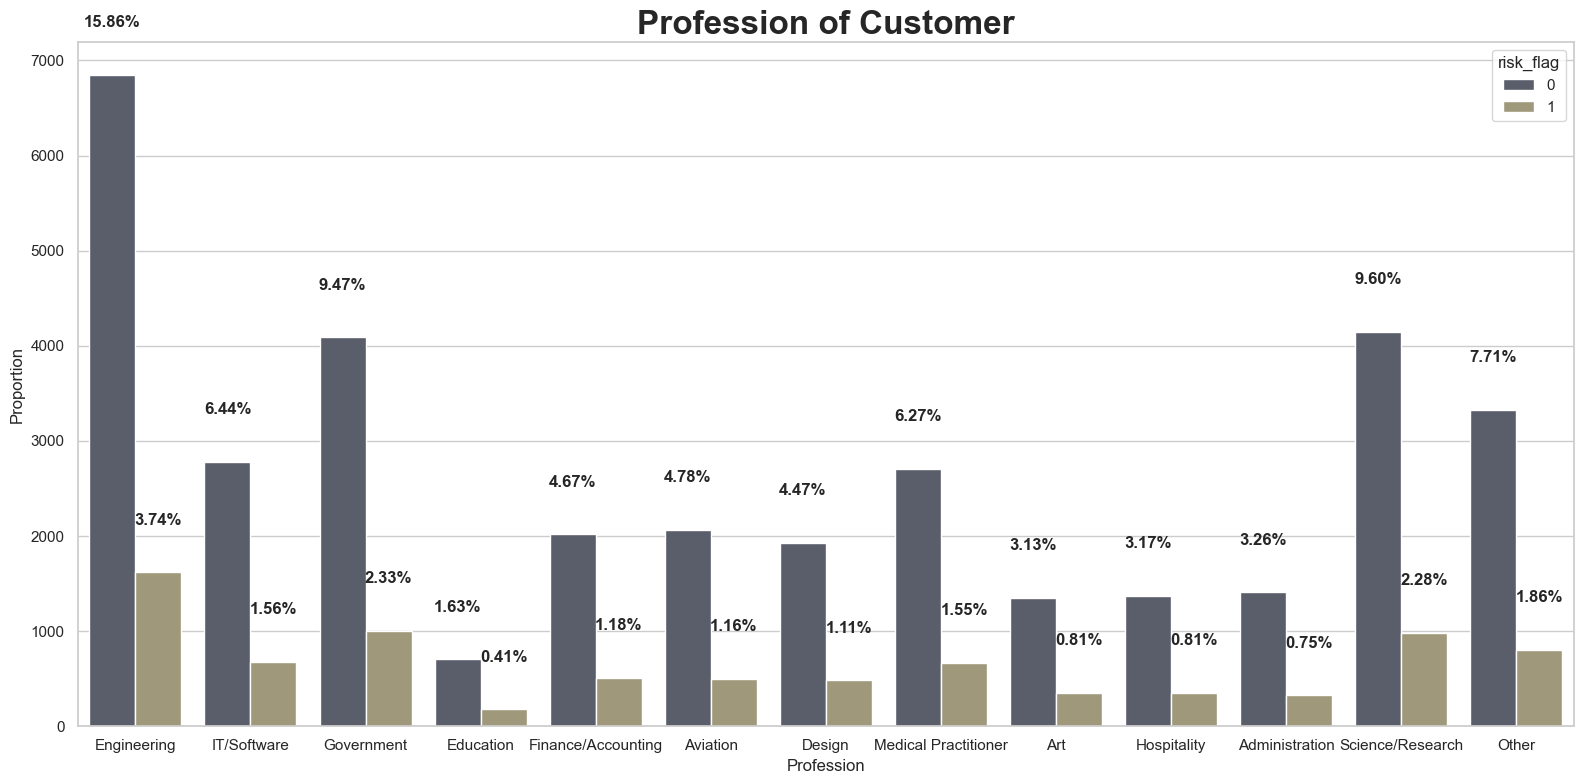

In [49]:
plt.figure(figsize=(16,8))

ax = sns.countplot(x='profession_map', hue='risk_flag', palette='cividis', data=df)

plt.title('Profession of Customer', fontdict={'fontsize':24, 'fontweight':'bold'}, loc='center')
plt.xlabel('Profession')
plt.ylabel('Proportion')

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2.,
            y=height + 500,
            s=f'{height / total:.2%}',
            fontdict={'fontsize':12, 'fontweight':'bold'},
            ha='center')


plt.tight_layout()
plt.show()

Tidak ada pengaruh yang signifikan antara customer yang default dan non-default berdasarkan kategori profesi.

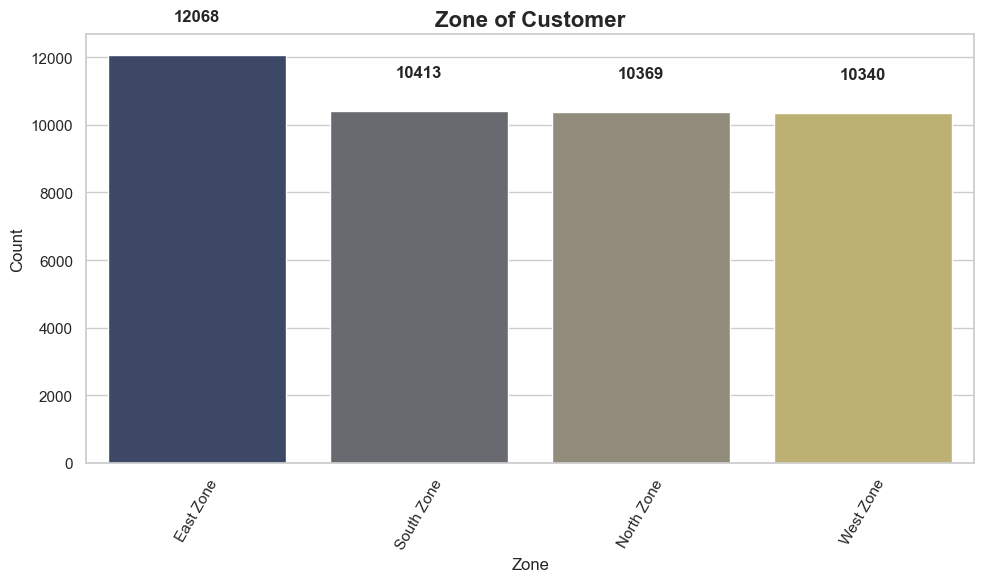

In [50]:
plt.figure(figsize=(10,6))

ax = sns.barplot(x='Zone', y='count', palette='cividis', data=df_zone)
plt.title('Zone of Customer',
          fontdict={'fontsize':16, 'fontweight':'bold'},
          loc='center')
plt.xlabel('Zone')
plt.ylabel('Count')
plt.xticks(rotation=60)

for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() /2.,
            y=height + 1000,
            s=int(height),
            fontdict={'fontsize':12, 'fontweight':'bold'},
            ha='center')

plt.tight_layout()
plt.show()

Zona wilayah dengan customer terbanyak adalah South Zone.

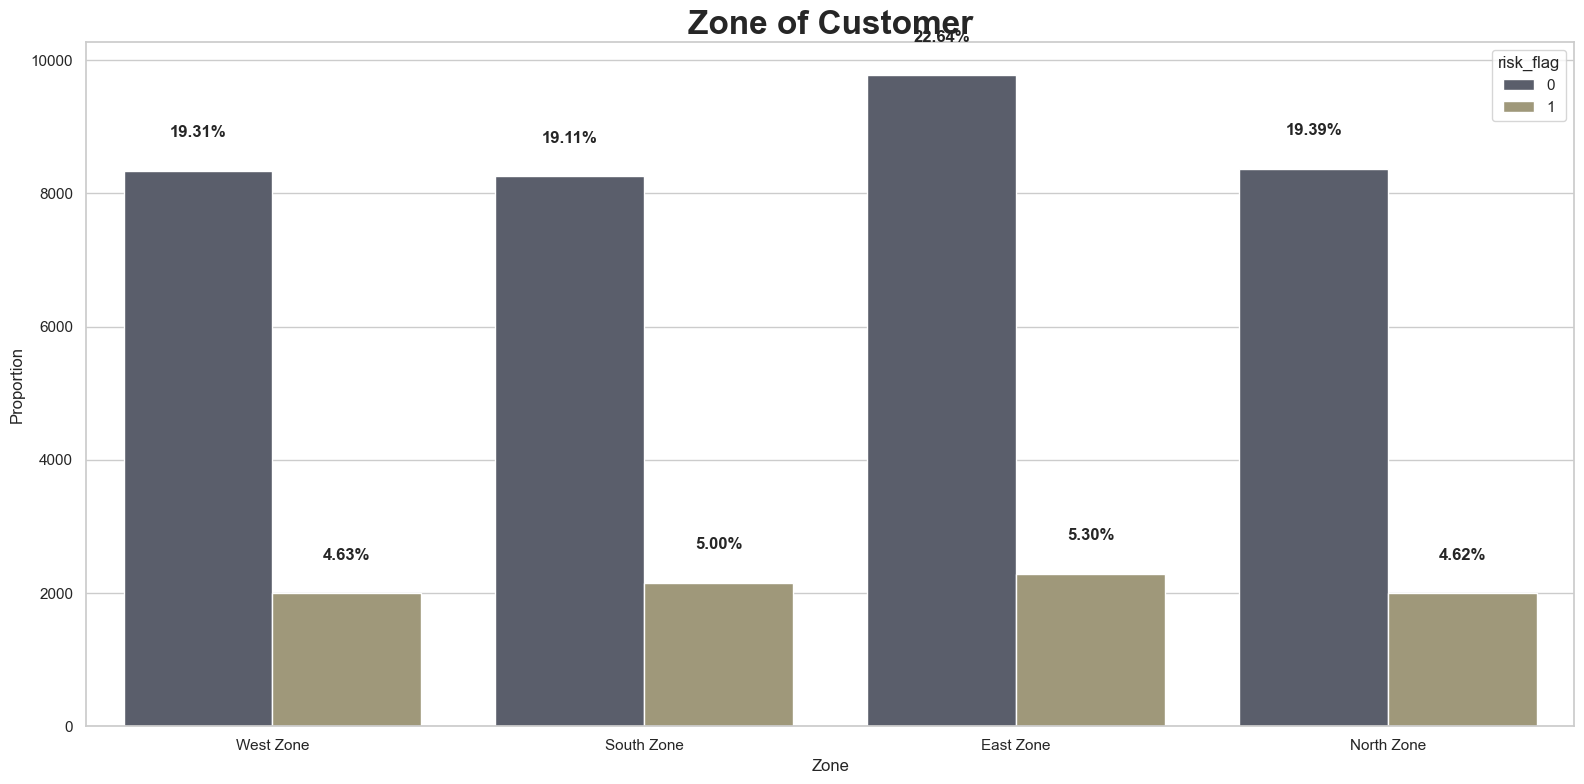

In [51]:
plt.figure(figsize=(16,8))

ax = sns.countplot(x='zone', hue='risk_flag', palette='cividis', data=df)

plt.title('Zone of Customer', fontdict={'fontsize':24, 'fontweight':'bold'}, loc='center')
plt.xlabel('Zone')
plt.ylabel('Proportion')

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2.,
            y=height + 500,
            s=f'{height / total:.2%}',
            fontdict={'fontsize':12, 'fontweight':'bold'},
            ha='center')


plt.tight_layout()
plt.show()

Tidak ada perbedaan siginifikan untuk tiap zone.

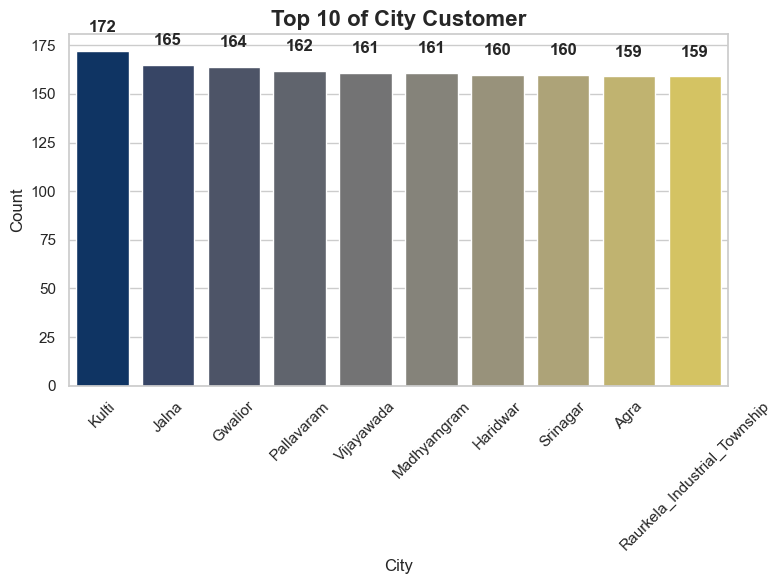

In [52]:
plt.figure(figsize=(8,6))

ax = sns.barplot(x='city', y='count', palette='cividis', data=df_city.head(10))
plt.title('Top 10 of City Customer',
          fontdict={'fontsize':16, 'fontweight':'bold'},
          loc='center')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)

for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() /2.,
            y=height + 10,
            s=int(height),
            fontdict={'fontsize':12, 'fontweight':'bold'},
            ha='center')

plt.tight_layout()
plt.show()

Diatas merupak top 10 customer terbanyak dengan Vijayanagaram sebagai kota dengan customer terbanyak.

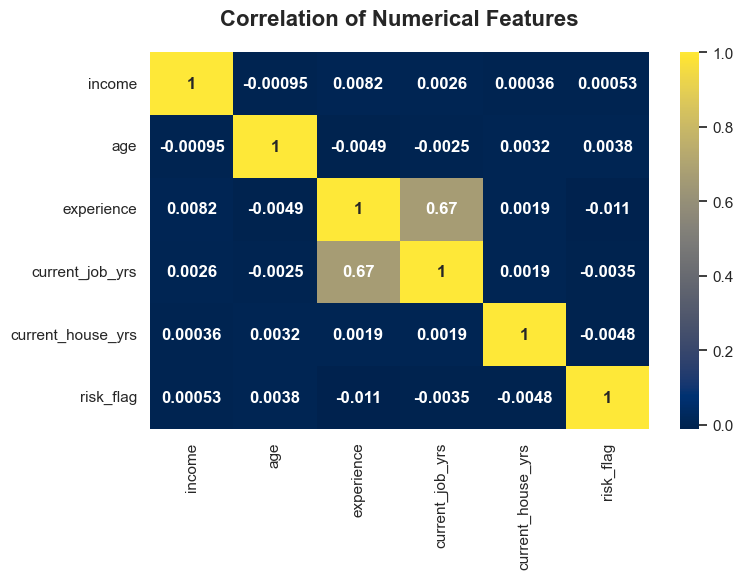

In [53]:
plt.figure(figsize=(8,6))

sns.heatmap(df.corr(numeric_only=True), cmap='cividis',
            annot=True, annot_kws={'fontweight':'bold'})
plt.title("Correlation of Numerical Features",
          fontdict={'fontsize':16, 'fontweight':'bold'},
          loc='center', y=1.05)

plt.tight_layout()
plt.show()

Berikut adalah beberapa interpretasi dari korelasi antara fitur dalam dataset:

1. **Income (Pendapatan)**:
   - Korelasi yang sangat rendah dengan semua fitur lainnya (kurang dari ±0.01).
   - Tidak ada korelasi yang signifikan antara pendapatan dan fitur lainnya dalam dataset.

2. **Age (Usia)**:
   - Korelasi yang rendah dengan fitur lainnya (antara -0.02 hingga 0.00).
   - Korelasi negatif yang kecil dengan `current_house_yrs` (-0.02), menunjukkan bahwa ada kecenderungan untuk orang yang lebih tua memiliki masa tinggal yang lebih singkat di rumah mereka saat ini.

3. **Experience (Pengalaman)**:
   - Korelasi rendah dengan fitur lainnya (antara -0.03 hingga 0.02).
   - Korelasi positif yang moderat dengan `current_job_yrs` (0.65), menunjukkan bahwa orang dengan lebih banyak pengalaman cenderung memiliki pekerjaan yang lebih lama.

4. **Current Job Years (Lama Bekerja Saat Ini)**:
   - Korelasi rendah hingga sedang dengan fitur lainnya (antara -0.02 hingga 0.65).
   - Korelasi positif yang moderat dengan `experience` (0.65), menunjukkan hubungan antara lamanya seseorang bekerja di pekerjaan saat ini dengan total pengalaman kerja mereka.

5. **Current House Years (Lama Tinggal di Rumah Saat Ini)**:
   - Korelasi rendah dengan fitur lainnya (antara -0.02 hingga 0.01).
   - Tidak ada korelasi yang signifikan antara lama tinggal di rumah saat ini dengan fitur lainnya dalam dataset.

6. **Risk Flag (Bendera Risiko)**:
   - Korelasi rendah dengan fitur lainnya (antara -0.03 hingga 0.01).
   - Tidak ada korelasi yang signifikan antara bendera risiko dengan fitur lainnya dalam dataset.

Dengan demikian, dari analisis korelasi, tidak ada hubungan linier yang kuat antara fitur-fitur dalam dataset.

## Multivariate Analysis

In [54]:
# Uji Test ANOVA
for col in numeric_cols:
    print(f"Uji ANOVA untuk {col}:")
    groups = [df[col][df['risk_flag'] == i] for i in df['risk_flag'].unique()]
    f_stat, p_value = f_oneway(*groups)
    print("Nilai F-statistic:", f_stat)
    print("P-value:", p_value)
    if p_value < 0.05:
        print("Terdapat perbedaan yang signifikan.")
    else:
        print("Tidak terdapat perbedaan yang signifikan.")
    print()

Uji ANOVA untuk income:
Nilai F-statistic: 0.011997883371170883
P-value: 0.9127787906422037
Tidak terdapat perbedaan yang signifikan.

Uji ANOVA untuk age:
Nilai F-statistic: 0.6328317128713752
P-value: 0.42632289366595044
Tidak terdapat perbedaan yang signifikan.

Uji ANOVA untuk experience:
Nilai F-statistic: 4.948322123136737
P-value: 0.026121150698286806
Terdapat perbedaan yang signifikan.

Uji ANOVA untuk current_job_yrs:
Nilai F-statistic: 0.5226964749849932
P-value: 0.4696976188292873
Tidak terdapat perbedaan yang signifikan.

Uji ANOVA untuk current_house_yrs:
Nilai F-statistic: 0.9922898326654631
P-value: 0.3191889437030082
Tidak terdapat perbedaan yang signifikan.

Uji ANOVA untuk risk_flag:
Nilai F-statistic: inf
P-value: 0.0
Terdapat perbedaan yang signifikan.



E:\src\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:3895: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


Hanya fitur `Experience` pada kolom numerik yang memiliki korelasi terhadap kolom `Risk_Flag`.

In [55]:
# Uji Chi Square Test
for col in categorical_cols:
    print(f"Uji chi-square untuk {col}:")
    contingency_table = pd.crosstab(df[col], df['risk_flag'])
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    print("Nilai chi-square statistic:", chi2_stat)
    print("P-value:", p_value)
    if p_value < 0.05:
        print("Terdapat hubungan yang signifikan antara", col, "dan Risk_Flag.")
    else:
        print("Tidak terdapat hubungan yang signifikan antara", col, "dan Risk_Flag.")
    print()

Uji chi-square untuk married_single:
Nilai chi-square statistic: 0.06205500381281895
P-value: 0.8032769182207531
Tidak terdapat hubungan yang signifikan antara married_single dan Risk_Flag.

Uji chi-square untuk house_ownership:
Nilai chi-square statistic: 0.8681417129364828
P-value: 0.647866348337625
Tidak terdapat hubungan yang signifikan antara house_ownership dan Risk_Flag.

Uji chi-square untuk car_ownership:
Nilai chi-square statistic: 5.41881357122604
P-value: 0.019920892090605952
Terdapat hubungan yang signifikan antara car_ownership dan Risk_Flag.

Uji chi-square untuk profession:
Nilai chi-square statistic: 41.37478848832548
P-value: 0.802353821142208
Tidak terdapat hubungan yang signifikan antara profession dan Risk_Flag.

Uji chi-square untuk city:
Nilai chi-square statistic: 324.82927443412115
P-value: 0.3540338856287625
Tidak terdapat hubungan yang signifikan antara city dan Risk_Flag.

Uji chi-square untuk state:
Nilai chi-square statistic: 36.6426940357402
P-value: 0.12

Hanya fitur `Car_Ownership` ppada kolom categoric yang  memiliki korelasi terhadap kolom `Risk_Flag`.

In [56]:
status_grouped = df.groupby(['married_single', 'risk_flag']).size().unstack()
status_grouped['pcg'] = (status_grouped[1] / status_grouped.sum(axis=1)) * 100
status_grouped.sort_values(by='pcg', ascending=False)

risk_flag,0,1,pcg
married_single,,,
married,3501,859,19.70183
single,31246,7584,19.53129


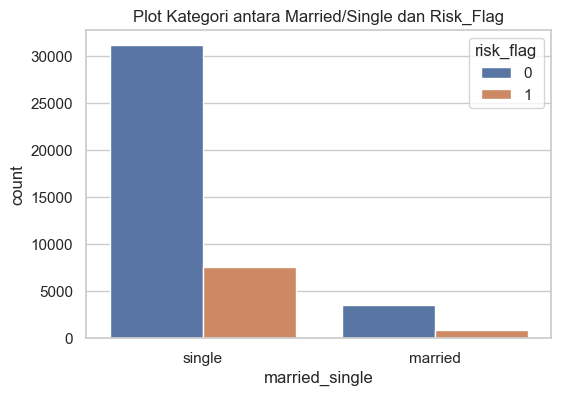

In [57]:
plt.figure(figsize=(6, 4))
sns.countplot(x='married_single', hue='risk_flag', data=df)
plt.title('Plot Kategori antara Married/Single dan Risk_Flag', fontsize=12)
plt.xticks(rotation=0)
plt.show()

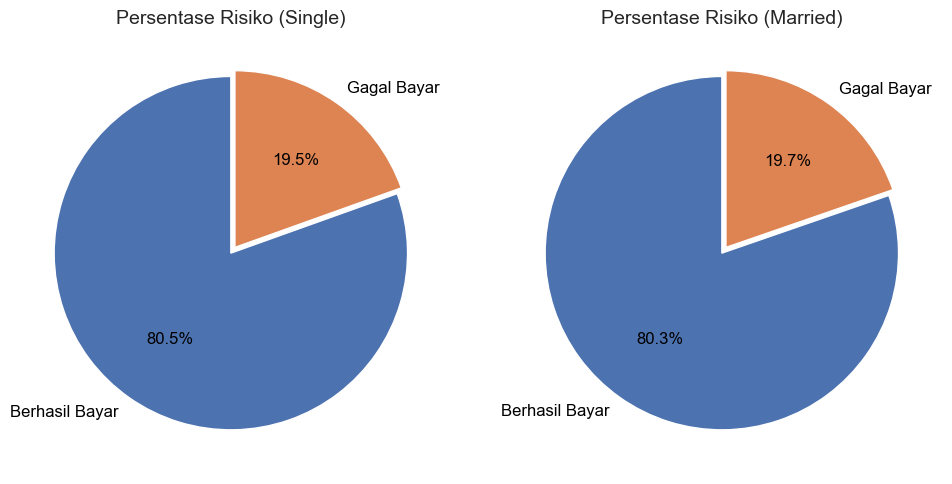

In [58]:
single_data = status_grouped.loc['single']
single_labels = ['Berhasil Bayar', 'Gagal Bayar']
single_sizes = [single_data[0], single_data[1]]

married_data = status_grouped.loc['married']
married_labels = ['Berhasil Bayar', 'Gagal Bayar']
married_sizes = [married_data[0], married_data[1]]

pie_explode = (0, 0.04)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axes[0].pie(single_sizes, labels=single_labels, autopct='%1.1f%%', startangle=90,
            textprops={'fontsize':12, 'color':'black'}, explode=pie_explode)
axes[0].set_title('Persentase Risiko (Single)', fontsize=14)

axes[1].pie(married_sizes, labels=married_labels, autopct='%1.1f%%', startangle=90,
            textprops={'fontsize':12, 'color':'black'}, explode=pie_explode)
axes[1].set_title('Persentase Risiko (Married)', fontsize=14)

plt.tight_layout()
plt.show()

In [59]:
house_grouped = df.groupby(['house_ownership', 'risk_flag']).size().unstack()
house_grouped['pcg'] = (house_grouped[1] / house_grouped.sum(axis=1)) * 100
house_grouped.sort_values(by='pcg', ascending=False)

risk_flag,0,1,pcg
house_ownership,,,
norent_noown,1010,257,20.28414
owned,1794,450,20.05348
rented,31943,7736,19.49646


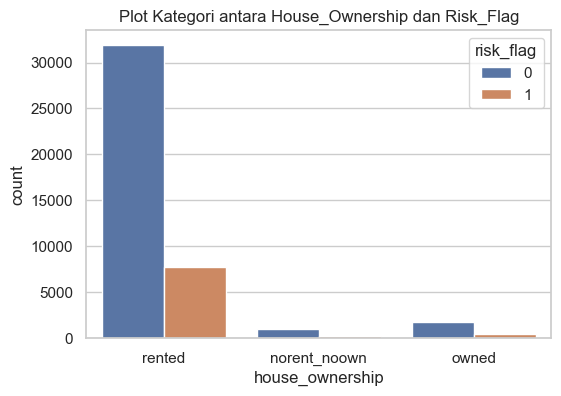

In [60]:
plt.figure(figsize=(6, 4))
sns.countplot(x='house_ownership', hue='risk_flag', data=df)
plt.title('Plot Kategori antara House_Ownership dan Risk_Flag', fontsize=12)
plt.xticks(rotation=0)
plt.show()

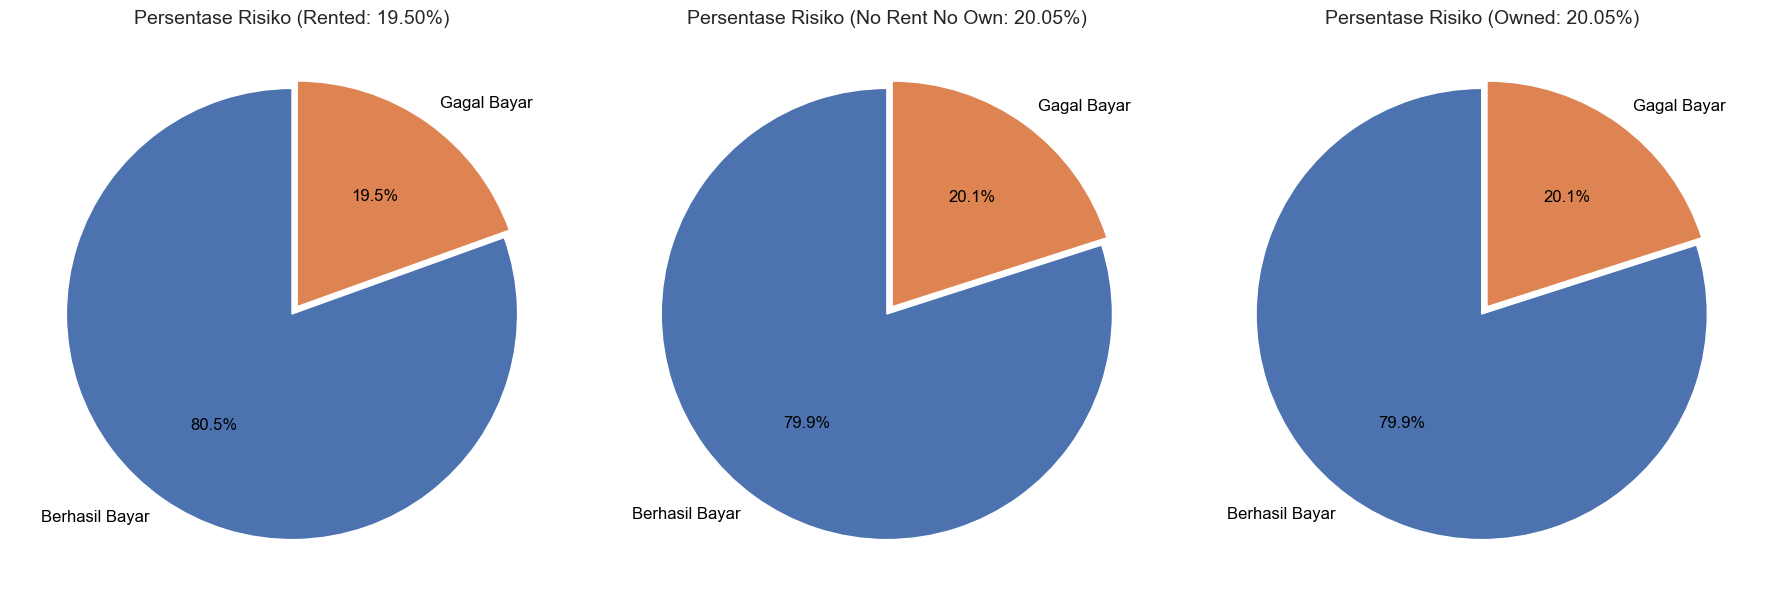

In [61]:
rented_data = house_grouped.loc['rented']
rented_labels = ['Berhasil Bayar', 'Gagal Bayar']
rented_sizes = [rented_data[0], rented_data[1]]
rented_pcg = rented_data['pcg']

owned_data = house_grouped.loc['norent_noown']
owned_labels = ['Berhasil Bayar', 'Gagal Bayar']
owned_sizes = [owned_data[0], owned_data[1]]
owned_pcg = owned_data['pcg']

owned_data = house_grouped.loc['owned']
owned_labels = ['Berhasil Bayar', 'Gagal Bayar']
owned_sizes = [owned_data[0], owned_data[1]]
owned_pcg = owned_data['pcg']

pie_explode = (0, 0.04)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

axes[0].pie(rented_sizes, labels=rented_labels, autopct='%1.1f%%', startangle=90,
            textprops={'fontsize':12, 'color':'black'}, explode=pie_explode)
axes[0].set_title(f'Persentase Risiko (Rented: {rented_pcg:.2f}%)', fontsize=14)

axes[1].pie(owned_sizes, labels=owned_labels, autopct='%1.1f%%', startangle=90,
            textprops={'fontsize':12, 'color':'black'}, explode=pie_explode)
axes[1].set_title(f'Persentase Risiko (No Rent No Own: {owned_pcg:.2f}%)', fontsize=14)

axes[2].pie(owned_sizes, labels=owned_labels, autopct='%1.1f%%', startangle=90,
            textprops={'fontsize':12, 'color':'black'}, explode=pie_explode)
axes[2].set_title(f'Persentase Risiko (Owned: {owned_pcg:.2f}%)', fontsize=14)

plt.tight_layout()
plt.show()

In [62]:
profession_grouped = df.groupby(['profession', 'risk_flag']).size().unstack()
profession_grouped['pcg'] = (profession_grouped[1] / profession_grouped.sum(axis=1)) * 100
profession_grouped.sort_values(by='pcg', ascending=False).head(5)

risk_flag,0,1,pcg
profession,,,
Psychologist,648,188,22.48804
Technician,671,188,21.88591
Army_officer,629,172,21.47316
Police_officer,692,189,21.45289
Chartered_Accountant,651,177,21.37681


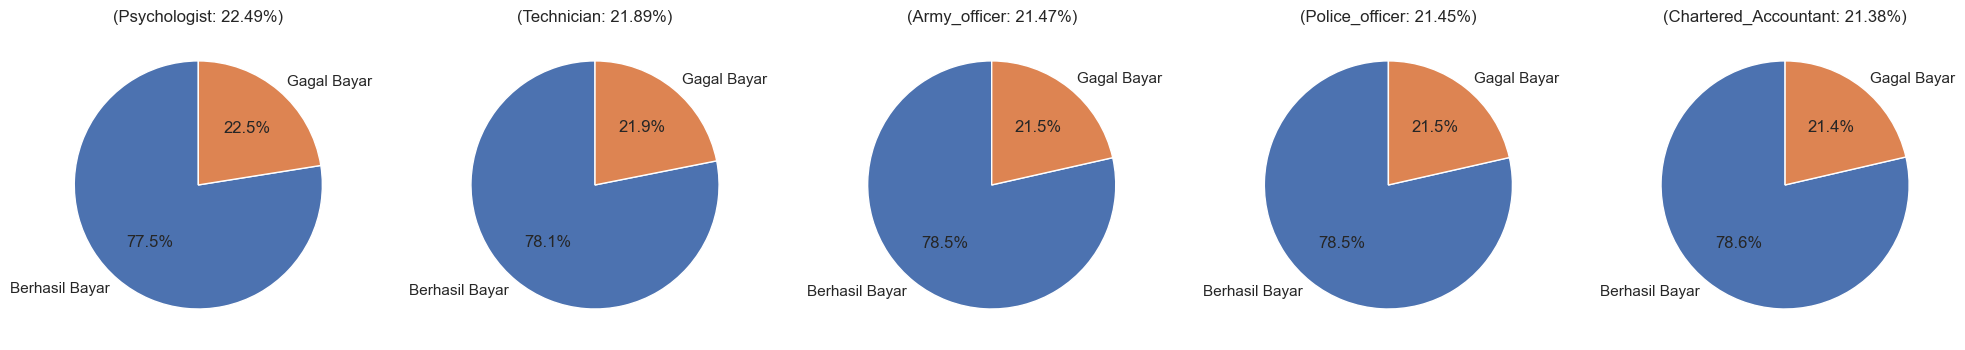

In [63]:
top_professions = profession_grouped.sort_values(by='pcg', ascending=False).head(5)

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))

for i, profession in enumerate(top_professions.index):
    axes[i].pie(top_professions.loc[profession, [0, 1]], labels=['Berhasil Bayar', 'Gagal Bayar'], autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'({profession}: {top_professions["pcg"][profession]:.2f}%)', fontsize=12)

plt.tight_layout()
plt.show()

In [64]:
city_grouped = df.groupby(['city', 'risk_flag']).size().unstack()
city_grouped['pcg'] = (city_grouped[1] / city_grouped.sum(axis=1)) * 100
top_cities = city_grouped.sort_values(by='pcg', ascending=False).head()

In [65]:
state_grouped = df.groupby(['state', 'risk_flag']).size().unstack().sort_values(by=1, ascending=False)
state_grouped['pcg'] = (state_grouped[1] / state_grouped.sum(axis=1)) * 100
state_grouped.sort_values(by='pcg', ascending=False).head()

risk_flag,0,1,pcg
state,,,
Manipur,96,31,24.40945
Uttar_Pradesh[5],112,36,24.32432
Puducherry,201,61,23.28244
Tripura,116,34,22.66667
Kerala,776,216,21.77419


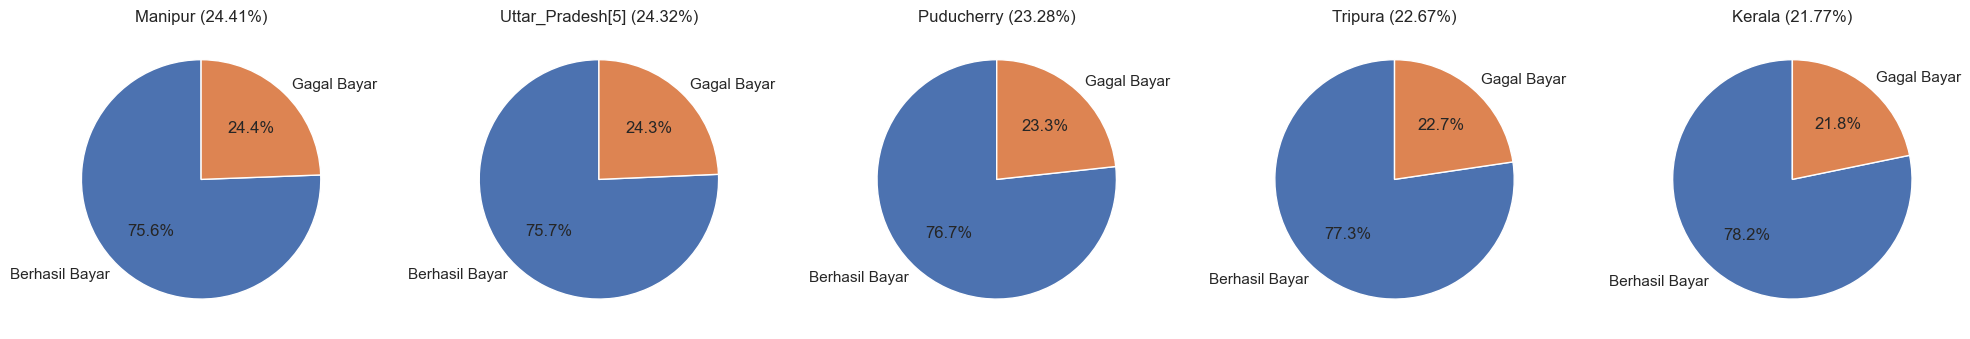

In [66]:
top_states = state_grouped.sort_values(by='pcg', ascending=False).head()

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

for i, state in enumerate(top_states.index):
    sizes = top_states.loc[state, [0, 1]]
    axes[i].pie(sizes, labels=['Berhasil Bayar', 'Gagal Bayar'], autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{state} ({top_states["pcg"][state]:.2f}%)', fontsize=12)

plt.tight_layout()
plt.show()

,income,age,experience,current_job_yrs,current_house_yrs,risk_flag
income,1.00000,-0.00095,0.00815,0.00264,0.00036,0.00053
age,-0.00095,1.00000,-0.00490,-0.00254,0.00322,0.00383
experience,0.00815,-0.00490,1.00000,0.66608,0.00193,-0.01070
current_job_yrs,0.00264,-0.00254,0.66608,1.00000,0.00195,-0.00348
current_house_yrs,0.00036,0.00322,0.00193,0.00195,1.00000,-0.00479
risk_flag,0.00053,0.00383,-0.01070,-0.00348,-0.00479,1.00000


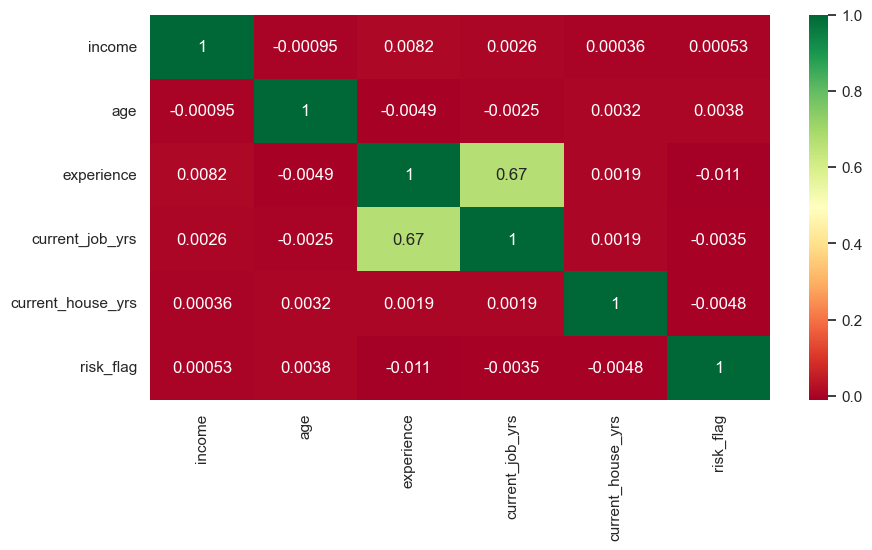

In [67]:
plt.figure(figsize=(10,5))
c= numeric_cols.corr()
sns.heatmap(c,cmap="RdYlGn",annot=True)
c

In [68]:
def pearson_corr(data1, data2, title):
    print(f"-- {title} --")
    print()

    coef, p = stats.pearsonr(data1, data2)
    print(f"Pearson corr coef: {coef:.3f}")
    print()

    alpha = .05
    if (p > alpha):
        print(f"Sampel tidak berkorelasi (gagal untuk menolak H0) p= {p:.3f}")
    else:
        print(f"Sampel memiliki korelasi (ditemukan bukti menolak H0) p= {p:.3f}")
    print()

In [70]:
pearson_corr(
    df1["income"],
    df1["risk_flag"],
    title= "Korelasi Pendapatan & Risk Flag (Risiko)"
)

NameError: name 'df1' is not defined

In [ ]:
pearson_corr(
    df1["Age"],
    df1["Risk_Flag"],
    title= "Korelasi Age & Risk Flag (Risiko)"
)

In [ ]:
pearson_corr(
    df1["CURRENT_JOB_YRS"],
    df1["Risk_Flag"],
    title= "Korelasi current job years & Risk Flag (Risiko)"
)

In [ ]:
pearson_corr(
    df1["Experience"],
    df1["Risk_Flag"],
    title= "Korelasi Experience & Risk Flag (Risiko)"
)

In [ ]:
pearson_corr(
    df1["CURRENT_HOUSE_YRS"],
    df1["Risk_Flag"],
    title= "Korelasi CURRENT_HOUSE_YRS & Risk Flag (Risiko)"
)

KESIMPULAN AKHIR:

- Dari Visualisasi Heatmap, Terlihat bahwa fitur **CURRENT_JOB_YRS** dan **Experience** memiliki korelasi yang tinggi.
- Dengan menggunakan chi square test, fitur yang memiliki korelasi dengan **Risk_Flag** adalah **Car_Ownership**.
- Dengan menggunakan Metode **Anova** dan **Pearson Correlation**, **Experience** lah yang memiliki korelasi dengan **Risk_Flag**.

Dari matriks korelasi antar fitur, **tidak ada pola yang menarik yang terlihat**. Hal ini menunjukkan bahwa **tidak ada hubungan kuat** antara fitur-fitur numerik tersebut. Oleh karena itu, tidak diperlukan tindakan khusus terhadap fitur-fitur numerik ini. fitur-fitur yang tidak memiliki korelasi kuat dengan **Risk_Flag** juga tidak perlu dibuang untuk saat ini karena **walaupun kecil, masih ada sedikit informasi** di dalamnya yang mungkin bisa digunakan nantinya.

Namun, dari uji chi-square dan ANOVA, kita melihat bahwa **Car_Ownership** dan **Experience** memiliki hubungan yang signifikan dengan label (**Risk_Flag**). Ini berarti bahwa kepemilikan mobil dan pengalaman dapat menjadi faktor yang relevan dalam memprediksi risiko gagal bayar. Oleh karena itu, fitur **Car_Ownership** dan **Experience** mungkin perlu dipertimbangkan lebih lanjut dalam model prediksi risiko gagal bayar.

Secara umum, hasil analisis menunjukkan bahwa faktor-faktor seperti status perkawinan, kepemilikan rumah, profesi, serta lokasi geografis dapat berpengaruh terhadap risiko pembayaran pinjaman.

Dari faktor-faktor ini dapat membantu lembaga keuangan untuk mengidentifikasi, mengukur, dan mengelola risiko pembayaran pinjaman dengan lebih efektif, serta mengambil keputusan yang lebih baik dalam hal penentuan kebijakan kredit dan pengelolaan risiko.




## Business Insight & Business Recomendations

1. **Pendapatan**: Distribusi pendapatan customer cenderung merata, namun kelompok customer yang mengalami default memiliki variasi pendapatan yang lebih besar daripada yang tidak mengalami default. Ini menunjukkan bahwa variasi pendapatan menjadi faktor yang berkontribusi pada kecenderungan default walaupun secara statistik tidak terdapat bukti yang kuat bahwa status pernikahan memiliki pengaruh terhadap customer yang default. Rekomendasi: Perusahaan perlu memperhatikan variasi pendapatan saat menilai risiko kredit.

2. **Usia**: Distribusi usia customer cenderung merata, kelompok customer yang mengalami default cenderung memiliki usia yang lebih muda daripada yang tidak mengalami default. Selain itu, secara statistik tidak terdapat bukti yang kuat bahwa status pernikahan memiliki pengaruh terhadap customer yang default. Rekomendasi: Perusahaan perlu mempertimbangkan faktor usia dalam penilaian risiko kredit dan mungkin menawarkan program khusus untuk kelompok pelanggan muda.

3. **Pengalaman Profesional**: Pengalaman profesional memberikan perbedaan signifikan antara customer yang default dan non-default. Selain itu, terdapat korelasi antara kepemilikan mobil dan default berdasarkan statistik. Rekomendasi: Perusahaan perlu mempertimbangkan faktor pengalaman profesional dalam menentukan risiko kredit.

4. **Lama Tinggal**: Tidak ada perbedaan signifikan antara lama tinggal dan default. Rekomendasi: Perusahaan perlu memperhatikan faktor-faktor lain selain lama tinggal dalam menilai risiko kredit.

5. **Status Pernikahan**: Proporsi customer yang masih single yang mengalami default lebih besar dibandingkan dengan yang sudah menikah walaupun kecil. Selain itu, secara statistik tidak terdapat bukti yang kuat bahwa status pernikahan memiliki pengaruh terhadap customer yang default. Rekomendasi: Perusahaan perlu mempertimbangkan status pernikahan sebagai salah satu faktor dalam menilai risiko kredit.

6. **Kepemilikan Rumah**: Customer yang memiliki rumah sewa lebih berisiko default dibandingkan yang tidak memiliki rumah sewa atau memiliki rumah sendiri. Rekomendasi: Perusahaan perlu mempertimbangkan kepemilikan rumah sebagai faktor risiko tambahan dalam menilai kredit.

7. **Kepemilikan Mobil**: Customer yang memiliki mobil cenderung memiliki risiko default yang lebih rendah. Selain itu, terdapat korelasi antara kepemilikan mobil dan default berdasarkan statistik. Rekomendasi: Perusahaan perlu menilai kepemilikan mobil sebagai indikator potensial untuk penilaian risiko kredit.

8. **Profesi**: Tidak ada pengaruh yang signifikan antara profesi customer dan default. Rekomendasi: Perusahaan perlu memperluas faktor-faktor penilaian risiko kredit dan tidak hanya bergantung pada profesi pelanggan.

Ini menunjukkan bahwa perusahaan perlu melihat lebih dari satu faktor dalam menilai risiko kredit dan mengembangkan model penilaian risiko yang lebih holistik untuk meminimalkan risiko default.

##### Sumber<br>
https://www.mapsofindia.com/maps/west/west.htm <br>
https://www.mapsofindia.com/maps/south/south.htm <br>
https://www.mapsofindia.com/maps/north/ <br>
https://www.indianetzone.com/78/east_indian_states.htm <br>
https://www.mapsofindia.com/maps/northeast/ <br>